# Introduction

Based on a given set of houses sold in Australia, this project aims to predict house prices in a particular region of Australia. Based on the given dataset, we aim to predict house prices to determine if buying a house at a given price is profitable. We will evaluate the key features in predicting the house sale prices in the given dataset to achieve this. The data is taken from:

https://www.kaggle.com/srikanthladda/house-price-prediction?select=train.csv

The data contains 1460 houses and 81 features. Among these features, some have a greater predictive power of sale price than others, and we want to clean up our data before identifying them. The data set we used contains 43 categorical features and 38 numerical features. The target variable in this dataset is the sale price, encoded as "SalePrice" in the data set, and thus we are dealing with a regression problem.

# Data Wrangling

In this section we clean the house data to make it ready for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


from sklearn.preprocessing import scale 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

from skopt import BayesSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [2]:
pd.set_option("max_columns" , 100)
pd.set_option("display.max_rows", 100)
pd.options.display.max_columns = 100

In [3]:
df = pd.read_csv('train.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
55%3

1

In [5]:
45-66

-21

Our target variable is the feature named "SalePrice", the last column in the data frame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe(include = 'all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count     91     1460        1460      1460      1460      1460         1460   
unique     2        4           4         2         5         3           25   
top     Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq      50      925        1311      1459      1052      1382          225   
mean     NaN      NaN         NaN       NaN       NaN       NaN          NaN   
std      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
min      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
25%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
50%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
75%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
max      NaN      NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460  1460.000000  1460.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.099315     5.575342   
std           NaN        NaN      NaN        NaN     1.382997     1.112799   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1460.000000   1460.000000      1460     1460        1460        1460   
unique          NaN           NaN         6        8          15          16   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN      1141     1434         515         504   
mean    1971.267808   1984.865753       NaN      NaN         NaN         NaN   
std       30.202904     20.645407       NaN      NaN         NaN         NaN   
min     1872.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1967.000000       NaN      NaN         NaN         NaN   
50%     1973.000000   1994.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1452  1452.000000      1460      1460       1460     1423   
unique          4          NaN         4         

In [7]:
# See the percentage of missing data

missing_data = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing_data.columns=['missing data (count)', 'missing data (%)']
missing_data.sort_values(by='missing data (count)', ascending = False)

missing data (count)  missing data (%)
PoolQC                         1453         99.520548
MiscFeature                    1406         96.301370
Alley                          1369         93.767123
Fence                          1179         80.753425
FireplaceQu                     690         47.260274
LotFrontage                     259         17.739726
GarageYrBlt                      81          5.547945
GarageCond                       81          5.547945
GarageType                       81          5.547945
GarageFinish                     81          5.547945
GarageQual                       81          5.547945
BsmtFinType2                     38          2.602740
BsmtExposure                     38          2.602740
BsmtQual                         37          2.534247
BsmtCond                         37          2.534247
BsmtFinType1                     37          2.534247
MasVnrArea                        8          0.547945
MasVnrType                        8          0.547945
Electrical                        1          0.068493
Id                                0          0.000000
Functional                        0          0.000000
Fireplaces                        0          0.000000
KitchenQual                       0          0.000000
KitchenAbvGr                      0          0.000000
BedroomAbvGr                      0          0.000000
HalfBath                          0          0.000000
FullBath                          0          0.000000
BsmtHalfBath                      0          0.000000
TotRmsAbvGrd                      0          0.000000
GarageCars                        0          0.000000
GrLivArea                         0          0.000000
GarageArea                        0          0.000000
PavedDrive                        0          0.000000
WoodDeckSF                        0          0.000000
OpenPorchSF                       0          0.000000
EnclosedPorch                     0          0.000000
3SsnPorch                         0          0.000000
ScreenPorch                       0          0.000000
PoolArea                          0          0.000000
MiscVal                           0          0.000000
MoSold                            0          0.000000
YrSold                            0          0.000000
SaleType                          0          0.000000
SaleCondition                     0          0.000000
BsmtFullBath                      0          0.000000
HeatingQC                         0          0.000000
LowQualFinSF                      0          0.000000
LandSlope                         0          0.000000
OverallQual                       0          0.000000
HouseStyle                        0          0.000000
BldgType                          0          0.000000
Condition2                        0          0.000000
Condition1                        0          0.000000
Neighborhood                      0          0.000000
LotConfig                         0          0.000000
YearBuilt                         0          0.000000
Utilities                         0          0.000000
LandContour                       0          0.000000
LotShape                          0          0.000000
Street                            0          0.000000
LotArea                           0          0.000000
MSZoning                          0          0.000000
OverallCond                       0          0.000000
YearRemodAdd                      0          0.000000
2ndFlrSF                          0          0.000000
BsmtFinSF2                        0          0.000000
1stFlrSF                          0          0.000000
CentralAir                        0          0.000000
MSSubClass                        0          0.000000
Heating                           0          0.000000
TotalBsmtSF                       0          0.000000
BsmtUnfSF                         0          0.000000
BsmtFinSF1                        0          0.000000
RoofStyle          

In [8]:
df = df.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"])

df.shape

(1460, 76)

In [9]:
# List the categorical features

df.select_dtypes('object')

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1         Veenker      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1455      Gilbert       Norm       Norm     1Fam     2Story     Gable   
1456       NWAmes       Norm       Norm     1Fam     1Story     Gable   
1457      Crawfor       Norm       Norm     1Fam     2Story     Gable   
1458        NAmes       Norm       Norm     1Fam     1Story       Hip   
1459      Edwards       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     MetalSd     MetalSd       None        TA        TA   
2     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng       None        TA        TA   
4     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1455  CompShg     VinylSd     VinylSd       None        TA        TA   
1456  CompShg     Plywood     Plywood      Stone        TA        TA   
1457  CompShg     CemntBd     CmentBd       None        Ex        Gd   
1458  CompShg     MetalSd     MetalSd       None        TA        TA   
1459  CompShg     HdBoard     HdBoard       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1        CBlock       Gd       TA           Gd          ALQ          Unf   
2         PConc       Gd       TA           Mn          GLQ          Unf   
3        BrkTil       TA       Gd           No          ALQ          Unf   
4         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1455      PConc       Gd       TA           No          Unf          Unf   
1456     CBlock       Gd       TA           No          ALQ          Rec   
1457      Stone       TA       Gd           No          GLQ          Unf   
1458     CBlock       TA       TA           Mn          GLQ          Rec   
1459     CBlock       TA       TA           No          BLQ          LwQ   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        Ex          Y      SBrkr          Gd        Typ   
1       GasA        Ex          Y      SBrkr          TA        Typ   
2       GasA        Ex          Y      SBrkr          Gd        Typ   
3       GasA        Gd          Y      SBrkr          Gd        Typ   
4       GasA        Ex          Y      SBrkr          Gd        Typ   
...      ...       ... 

In [10]:
categorical_feature_names = df.select_dtypes('object').columns

print(categorical_feature_names)

print("Total number of categorical features = ", len(categorical_feature_names))

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Total number of categorical features =  38


In [11]:
df_categorical = df[categorical_feature_names] 

df_categorical

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1         Veenker      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1455      Gilbert       Norm       Norm     1Fam     2Story     Gable   
1456       NWAmes       Norm       Norm     1Fam     1Story     Gable   
1457      Crawfor       Norm       Norm     1Fam     2Story     Gable   
1458        NAmes       Norm       Norm     1Fam     1Story       Hip   
1459      Edwards       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     MetalSd     MetalSd       None        TA        TA   
2     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng       None        TA        TA   
4     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1455  CompShg     VinylSd     VinylSd       None        TA        TA   
1456  CompShg     Plywood     Plywood      Stone        TA        TA   
1457  CompShg     CemntBd     CmentBd       None        Ex        Gd   
1458  CompShg     MetalSd     MetalSd       None        TA        TA   
1459  CompShg     HdBoard     HdBoard       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1        CBlock       Gd       TA           Gd          ALQ          Unf   
2         PConc       Gd       TA           Mn          GLQ          Unf   
3        BrkTil       TA       Gd           No          ALQ          Unf   
4         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1455      PConc       Gd       TA           No          Unf          Unf   
1456     CBlock       Gd       TA           No          ALQ          Rec   
1457      Stone       TA       Gd           No          GLQ          Unf   
1458     CBlock       TA       TA           Mn          GLQ          Rec   
1459     CBlock       TA       TA           No          BLQ          LwQ   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        Ex          Y      SBrkr          Gd        Typ   
1       GasA        Ex          Y      SBrkr          TA        Typ   
2       GasA        Ex          Y      SBrkr          Gd        Typ   
3       GasA        Gd          Y      SBrkr          Gd        Typ   
4       GasA        Ex          Y      SBrkr          Gd        Typ   
...      ...       ... 

In [12]:
# List the numerical features

df.select_dtypes('number')

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          2003          2003       196.0         706           0        150   
1          1976          1976         0.0         978           0        284   
2          2001          2002       162.0         486           0        434   
3          1915          1970         0.0         216           0        540   
4          2000          2000       350.0         655           0        490   
...         ...           ...         ...         ...         ...        ...   
1455       1999          2000         0.0           0           0        953   
1456       1978          1988       119.0         790         163        589   
1457       1941          2006         0.0         275           0        877   
1458       1950          1996         0.0          49        1029          0   
1459       1965          1965         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4

In [13]:
numerical_feature_names = df.select_dtypes('number').columns

print(numerical_feature_names)

print("Total number of numerical features = ", len(numerical_feature_names))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Total number of numerical features =  38


In [14]:
df_numerical = df[numerical_feature_names] 

df_numerical

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          2003          2003       196.0         706           0        150   
1          1976          1976         0.0         978           0        284   
2          2001          2002       162.0         486           0        434   
3          1915          1970         0.0         216           0        540   
4          2000          2000       350.0         655           0        490   
...         ...           ...         ...         ...         ...        ...   
1455       1999          2000         0.0           0           0        953   
1456       1978          1988       119.0         790         163        589   
1457       1941          2006         0.0         275           0        877   
1458       1950          1996         0.0          49        1029          0   
1459       1965          1965         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4

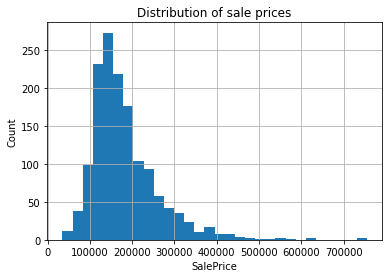

In [15]:
# Let us now look at the distribution of the Sale Price, our target feature   

df.SalePrice.hist(bins=30)
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.title('Distribution of sale prices');

In [16]:
df["SalePrice"] = np.log(df["SalePrice"])

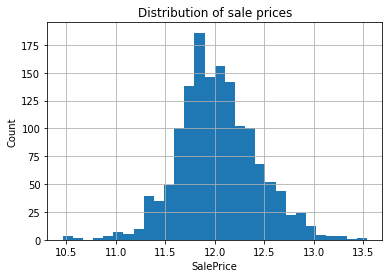

In [17]:
df.SalePrice.hist(bins=30)
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.title('Distribution of sale prices');

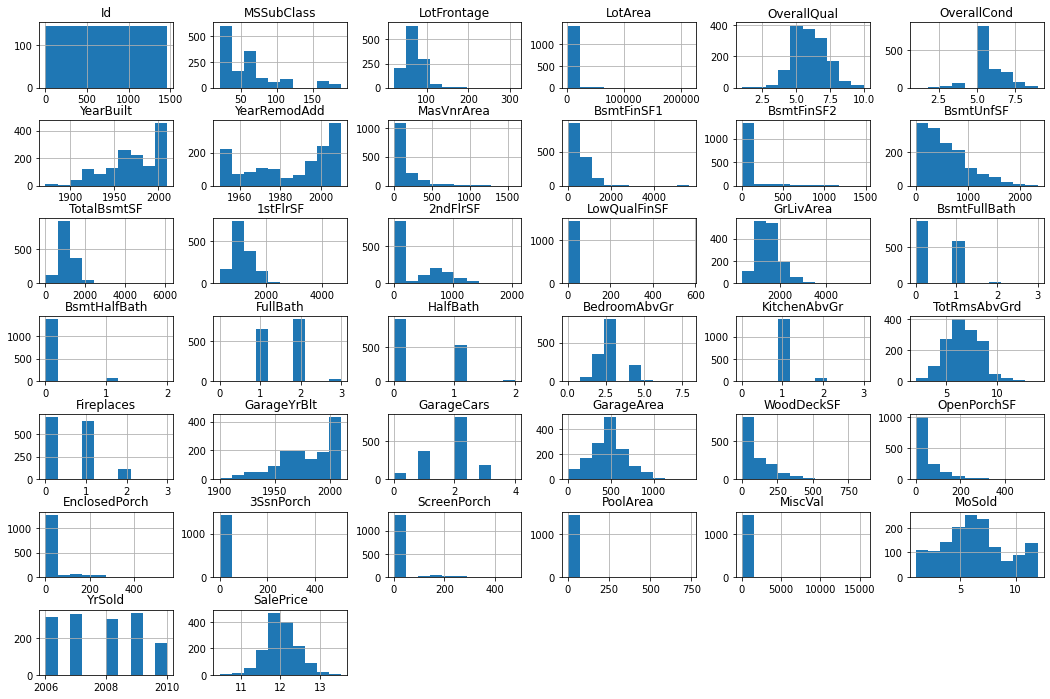

In [18]:
# Now let us take a look at the distribution of all numerical features 

df.hist(figsize=(18, 12))
plt.subplots_adjust(hspace=0.5);

In [19]:
# An integer value is assigned to the feature "MoSold", which refers to the month sold. Let us convert it to categorical data.

import calendar

df['MoSold'] = df['MoSold'].apply(lambda i: calendar.month_name[i])

df['MoSold']

0        February
1             May
2       September
3        February
4        December
          ...    
1455       August
1456     February
1457          May
1458        April
1459         June
Name: MoSold, Length: 1460, dtype: object

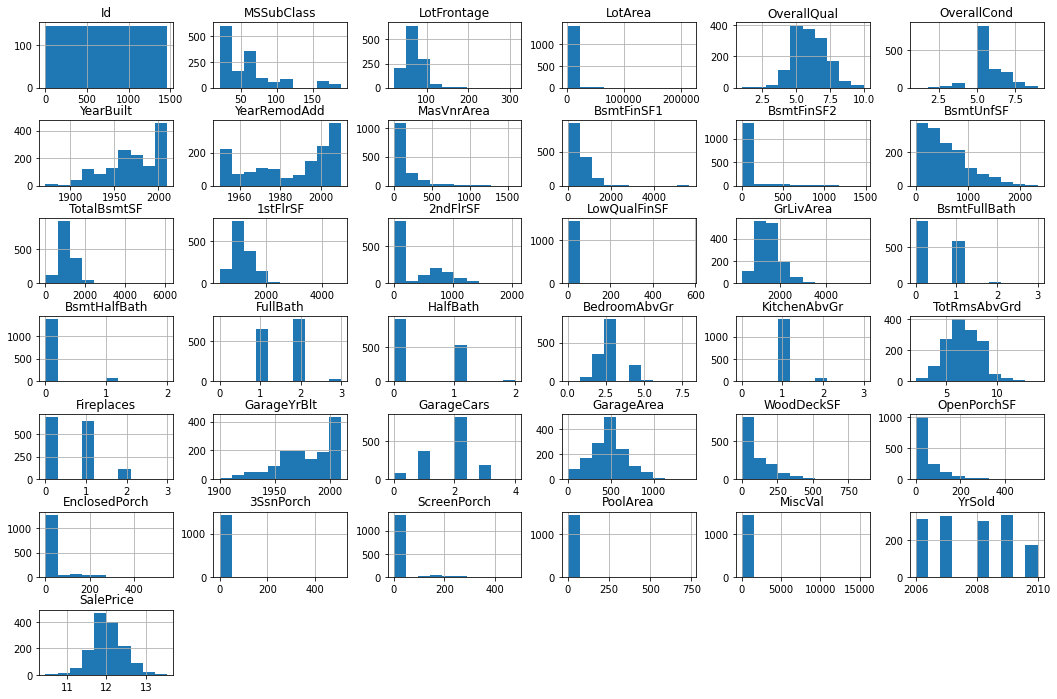

In [20]:
# Now let us check whether the feature "MoSold" disappeared from the numerical features 

categorical_feature_names = df.select_dtypes('object').columns
df_categorical = df[categorical_feature_names]

numerical_feature_names = df.select_dtypes('number').columns
df_numerical = df[numerical_feature_names]

df_numerical.hist(figsize=(18, 12))
plt.subplots_adjust(hspace=0.5);

In [21]:
# and see whether the feature 'MoSold' appears as a categorical feature 

print(categorical_feature_names)

print("Total number of categorical features = ", len(categorical_feature_names), '\n')


print(numerical_feature_names)

print("Total number of numerical features = ", len(numerical_feature_names))

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')
Total number of categorical features =  39 

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAb

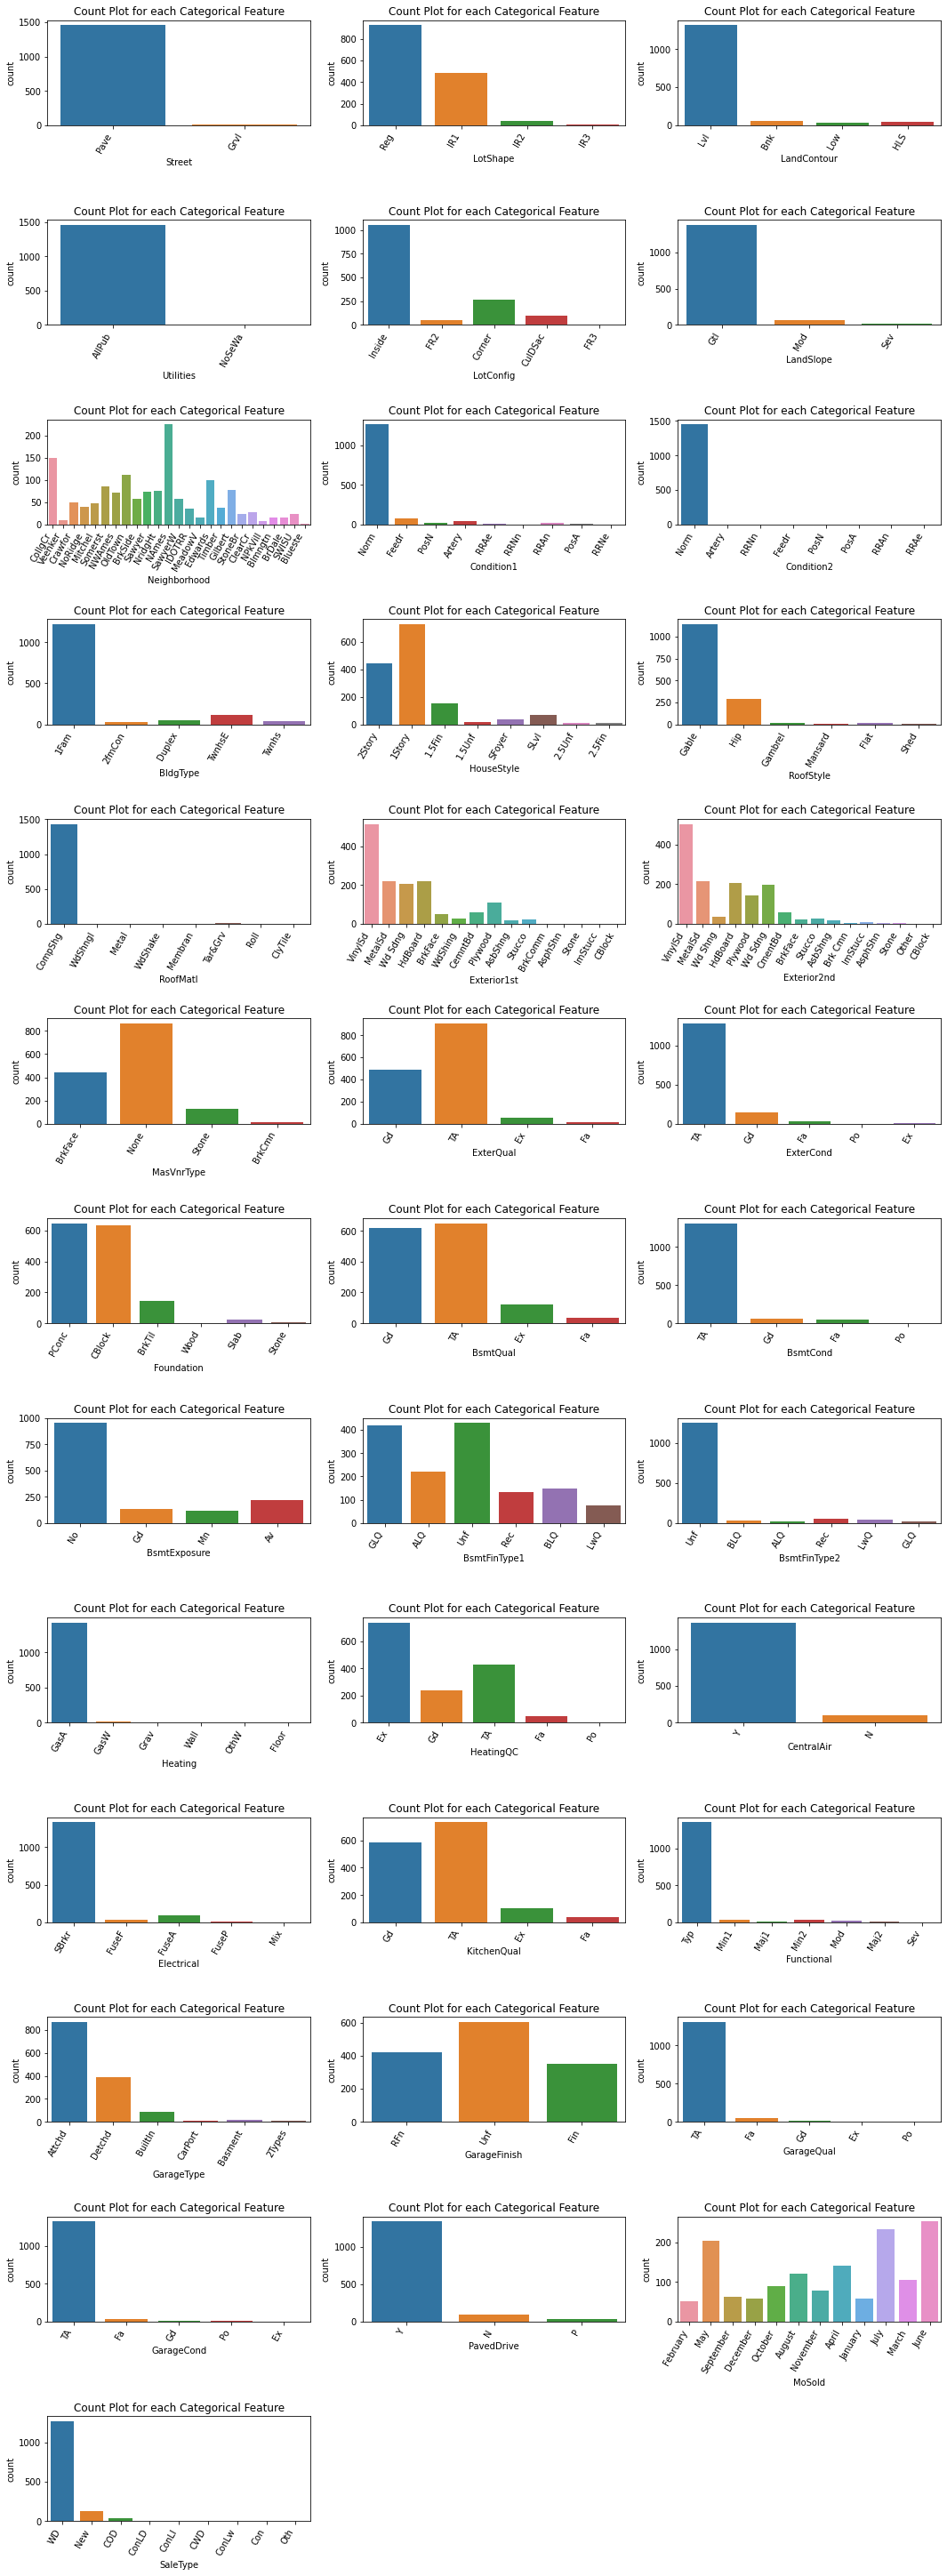

In [22]:
plt.figure(figsize=[18, 60])

for i in range(1, categorical_feature_names.size-1):
    plt.subplot(15,3,i)
    plt.subplots_adjust(hspace=0.9)
    ax = sns.countplot(x=df_categorical.columns[i], data=df)
    plt.setp(ax.get_xticklabels(), rotation=60, ha="right")
    plt.title("Count Plot for each Categorical Feature");


plt.show()

# EDA

In [23]:
correlator = df.corr()
correlator["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

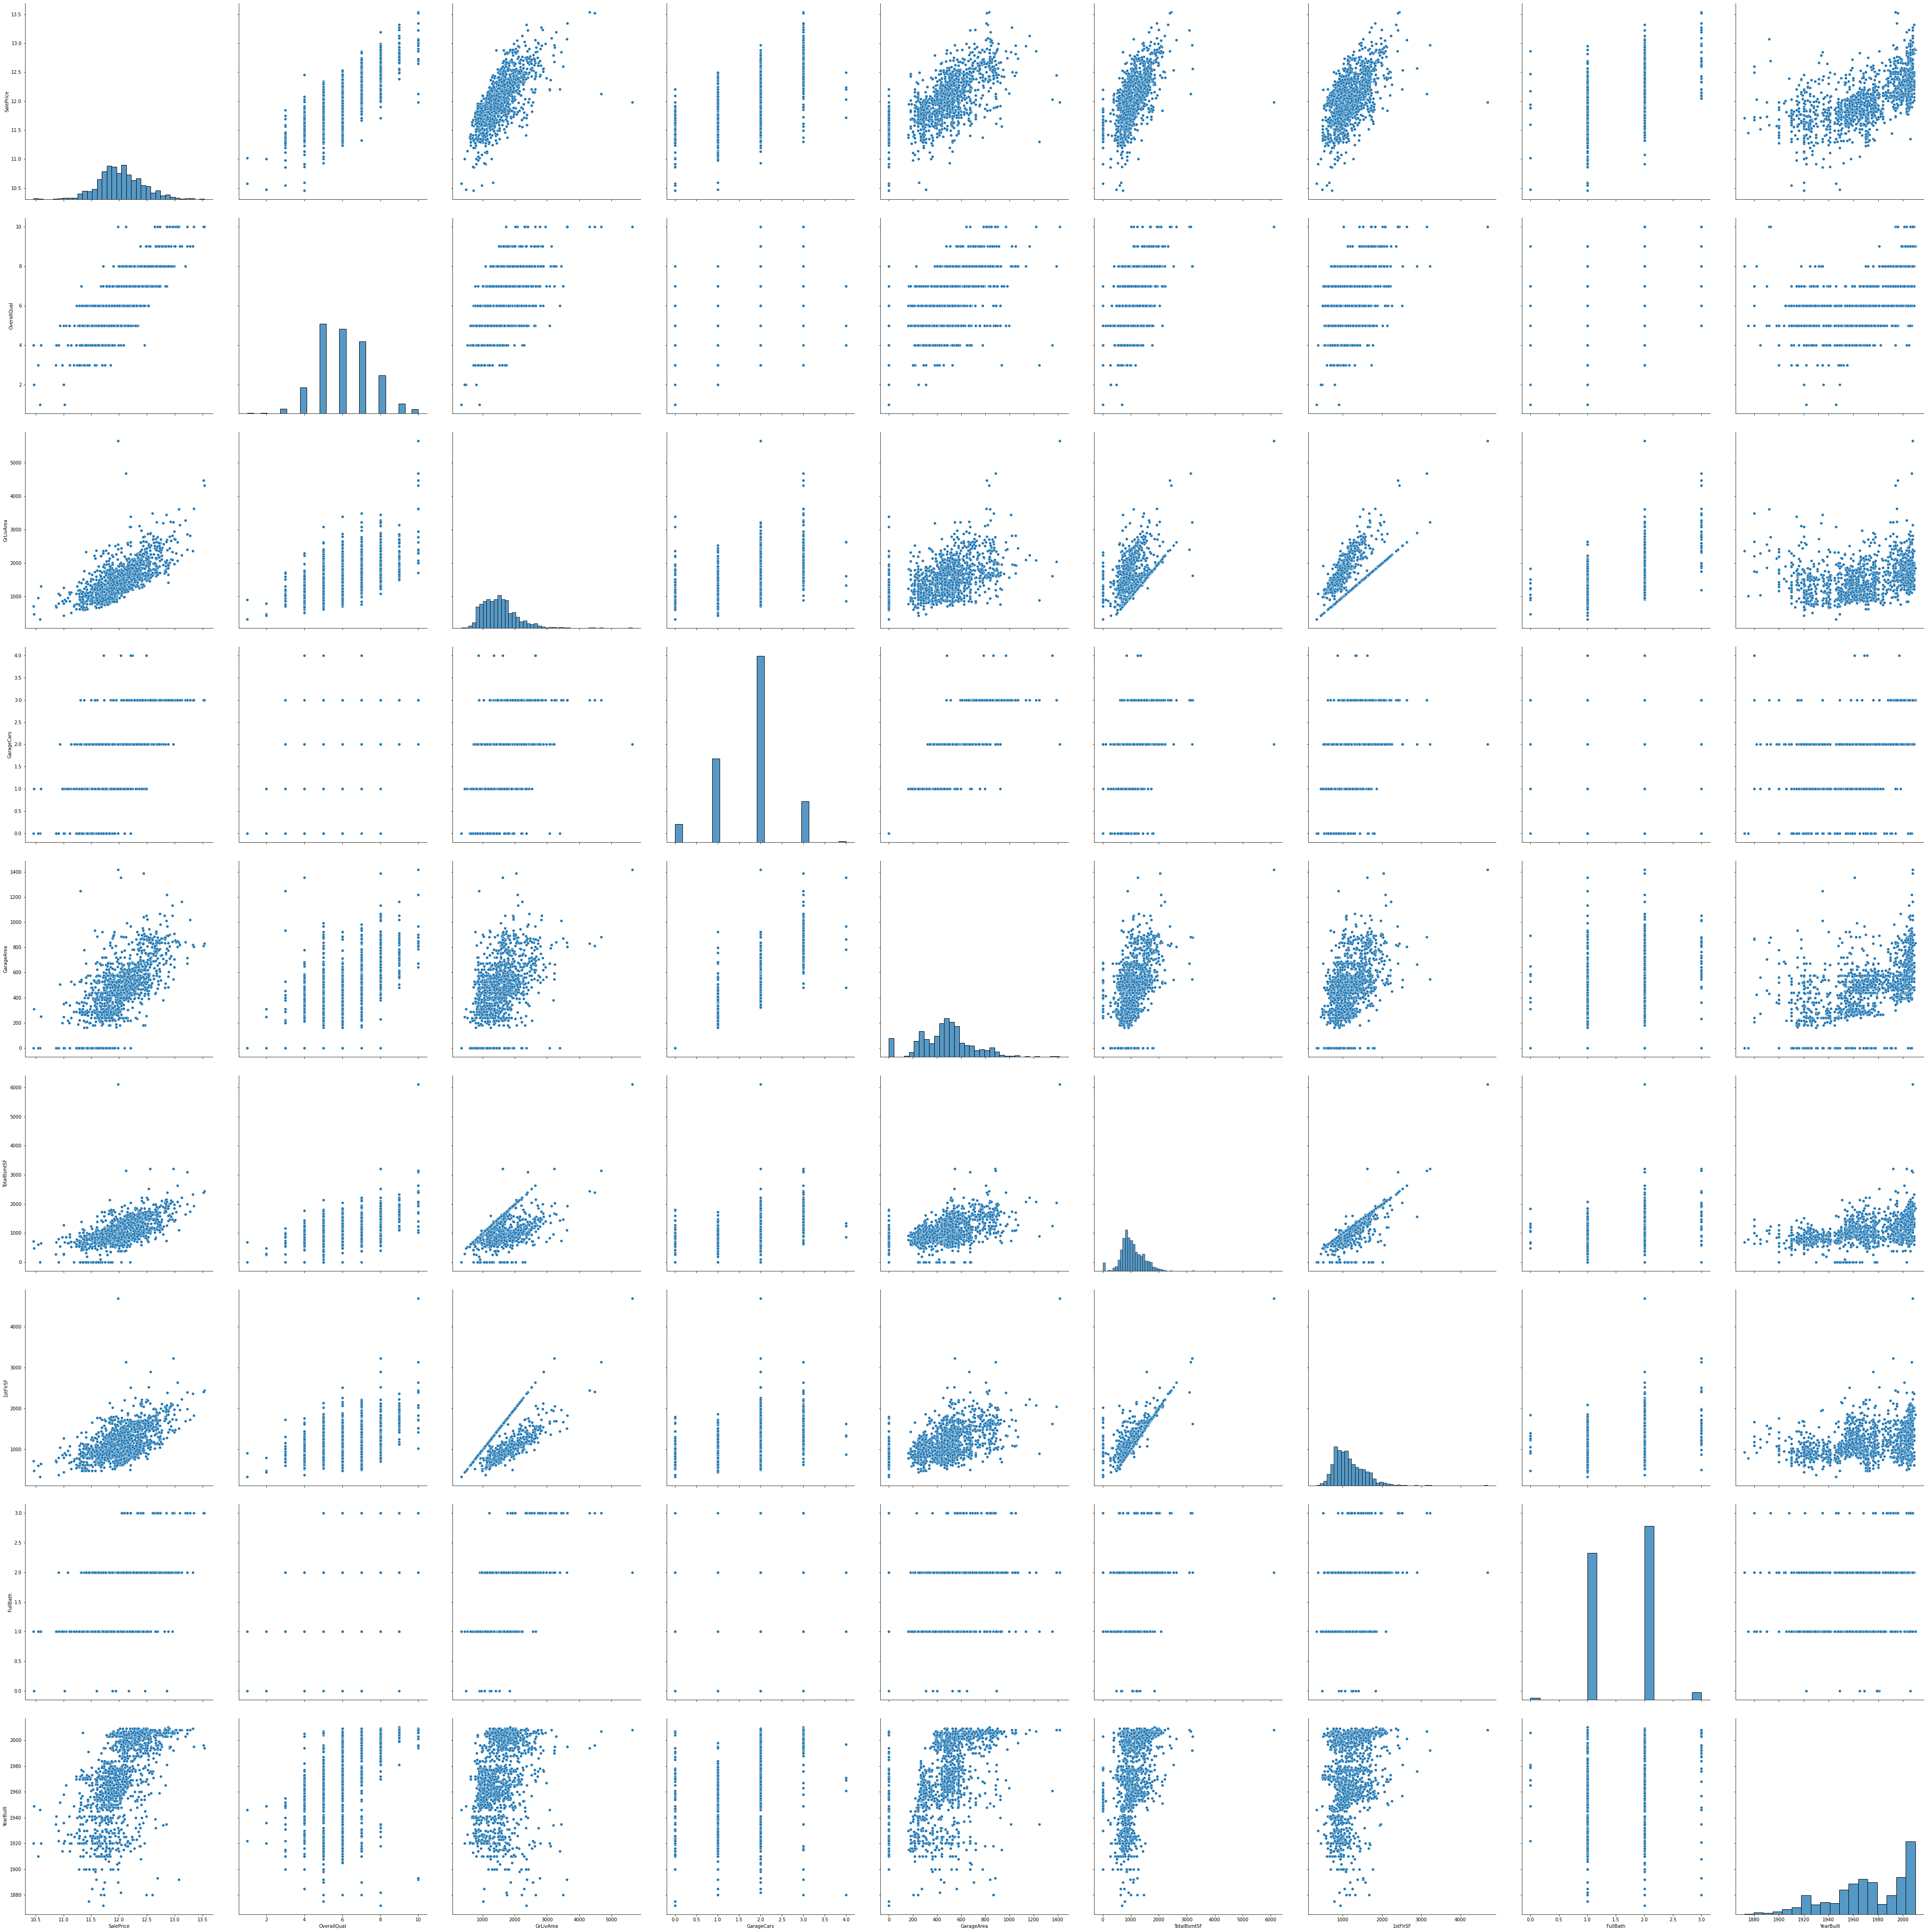

In [24]:
features = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", 
            "FullBath", "YearBuilt"]

pair_grid = sns.PairGrid(df_numerical[features])

pair_grid.fig.set_size_inches(60,60)
pair_grid.map_diag(sns.histplot)
pair_grid.map_offdiag(sns.scatterplot)

<AxesSubplot:>

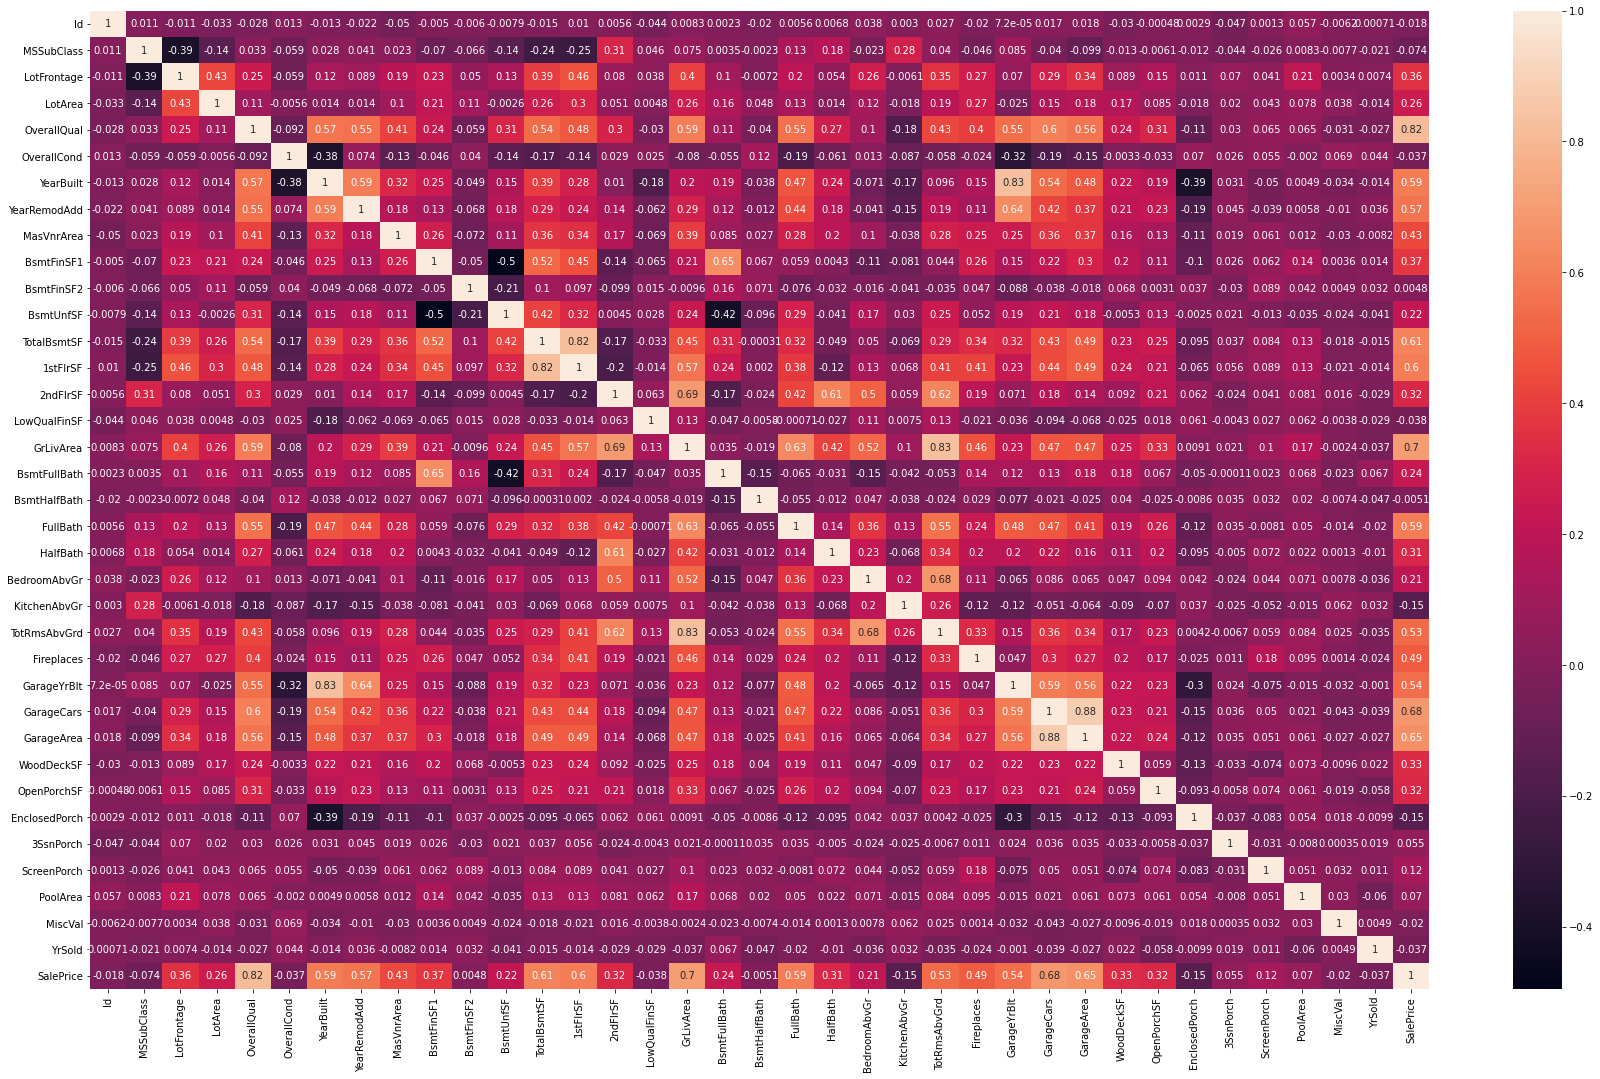

In [25]:
# Heatmap

plt.figure(figsize=(30,18))
 
sns.heatmap(df.corr(), annot = True)

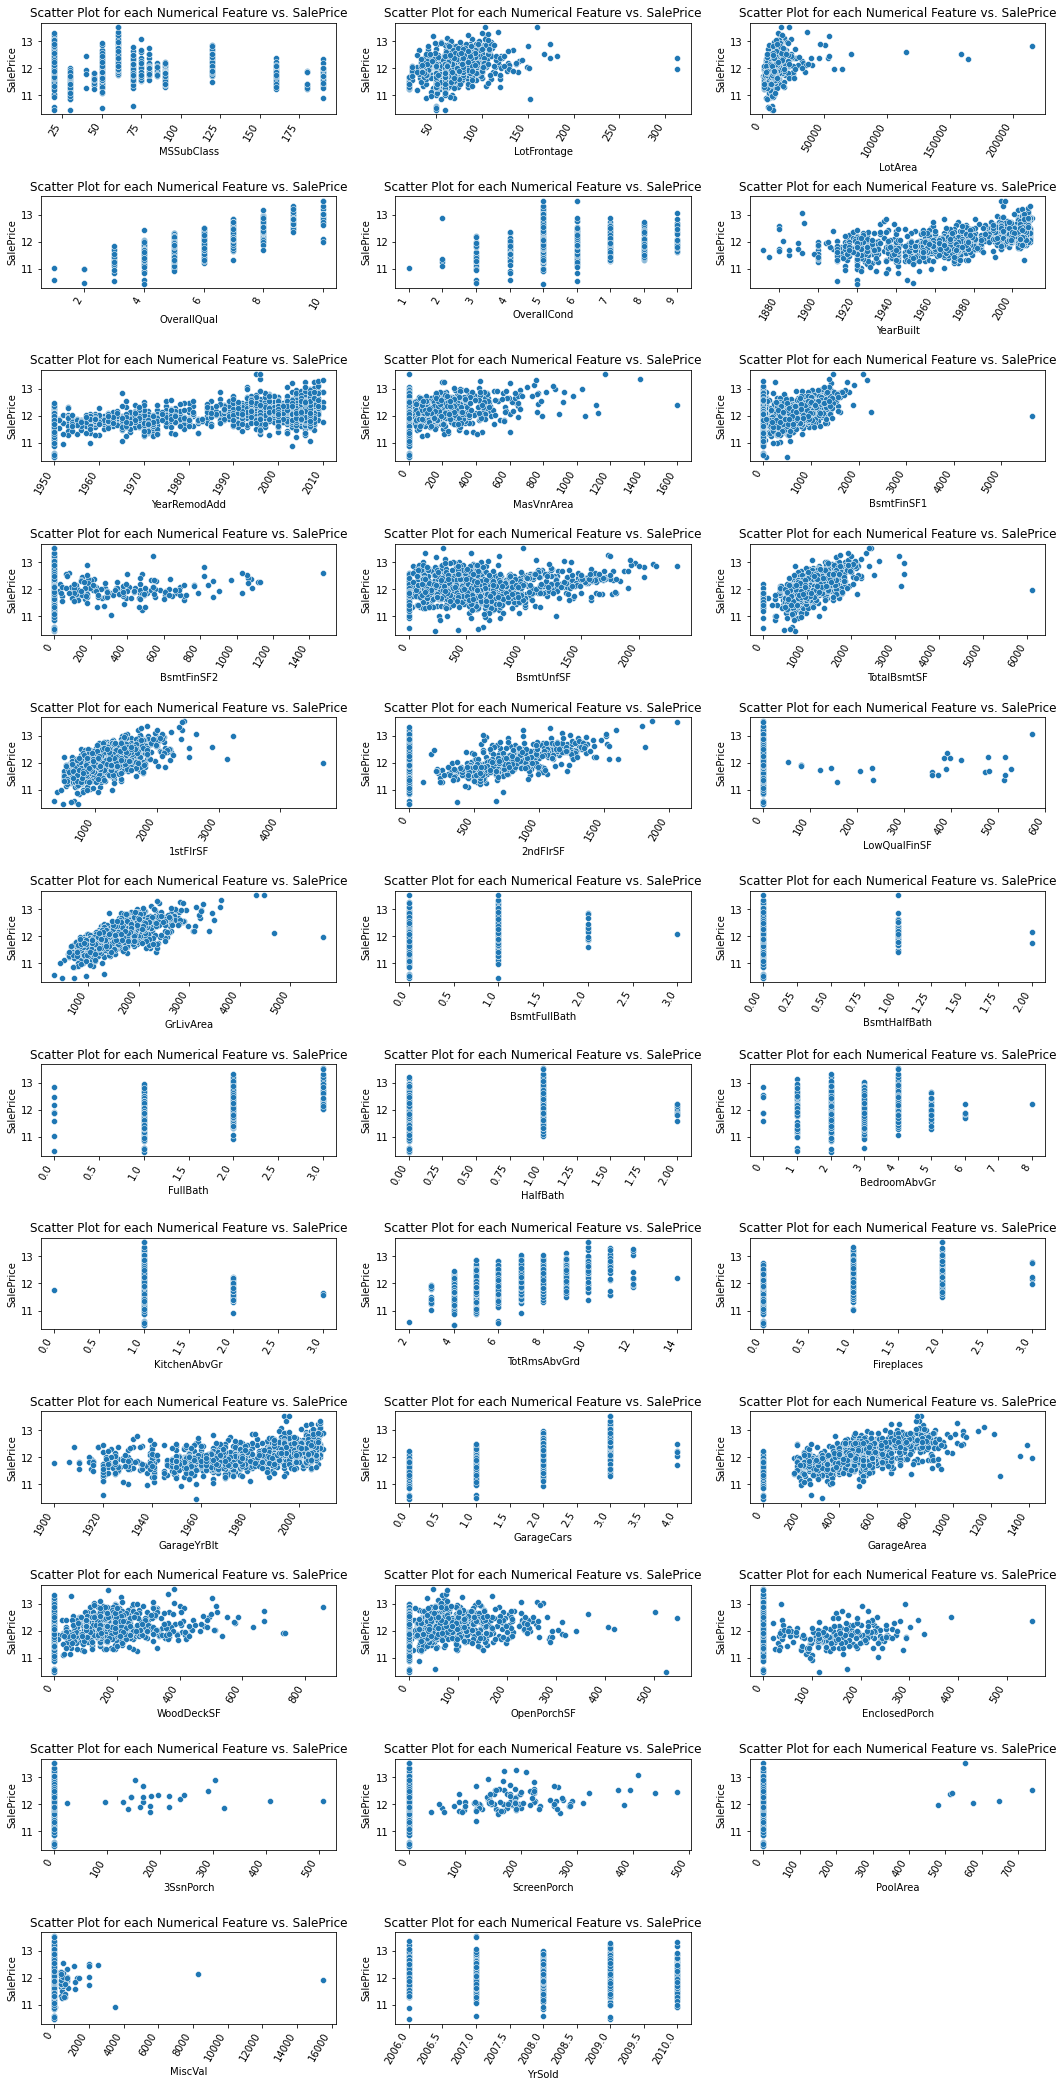

In [26]:
# Before filling NAs, let us explore the correlation between SalePrice and numerical features

plt.figure(figsize=[18, 40])

for i in range(1, numerical_feature_names.size-1):
    plt.subplot(13,3,i)
    plt.subplots_adjust(hspace=0.9)
    ax = sns.scatterplot(x=df_numerical.columns[i], y='SalePrice', data=df)
    plt.setp(ax.get_xticklabels(), rotation=60, ha="right")
    plt.title("Scatter Plot for each Numerical Feature vs. SalePrice");


plt.show()

/Users/KML/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


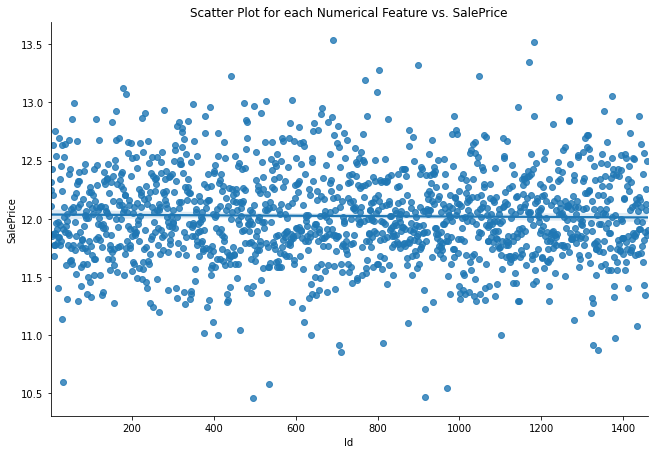

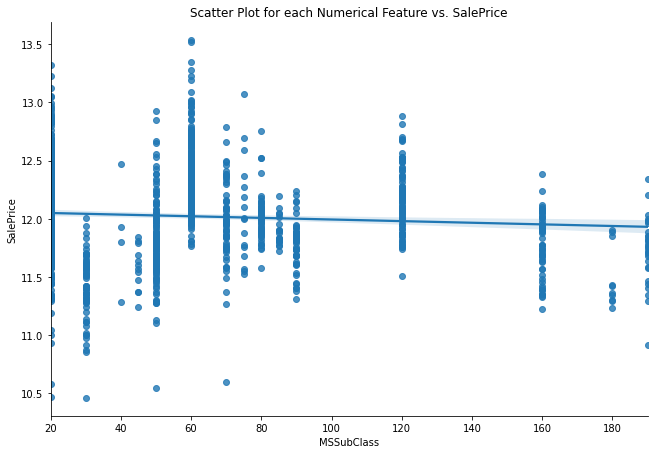

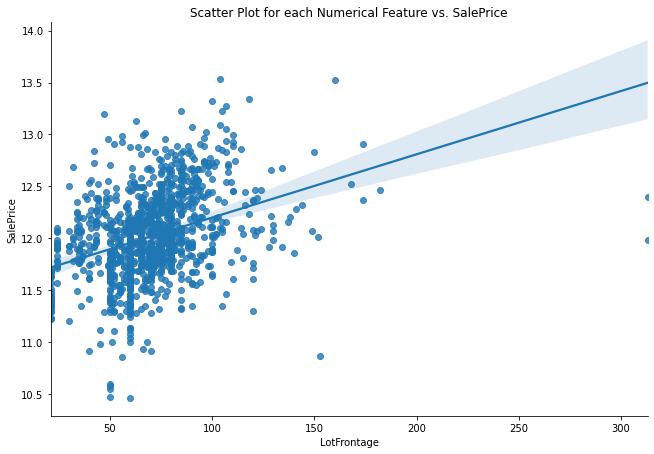

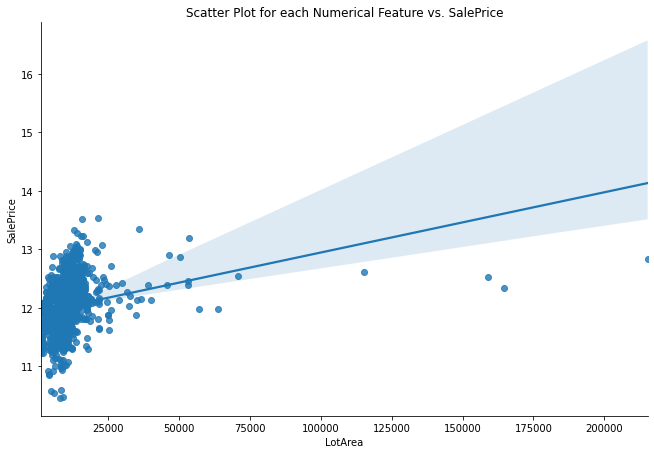

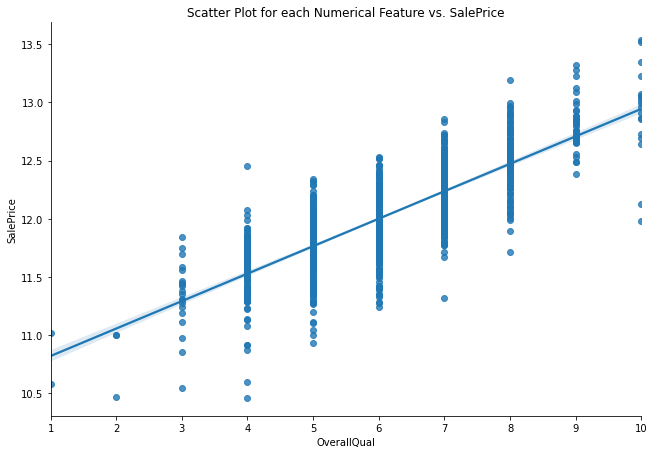

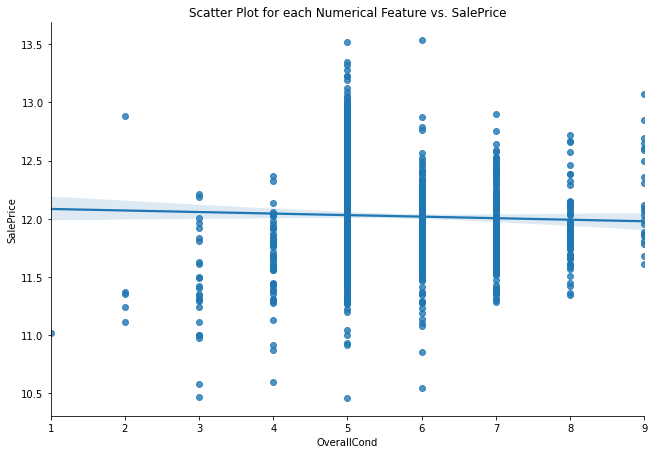

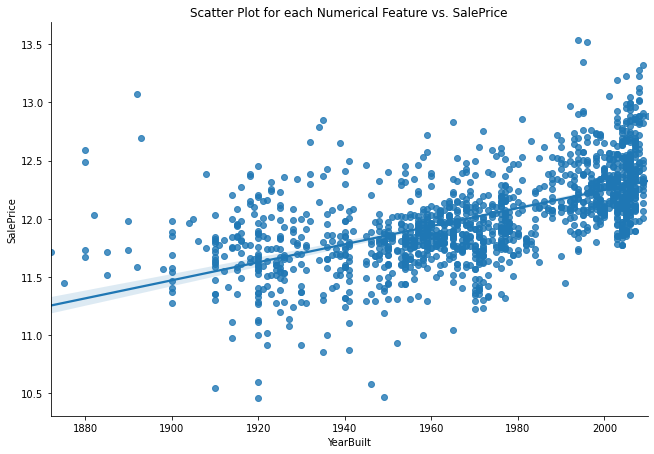

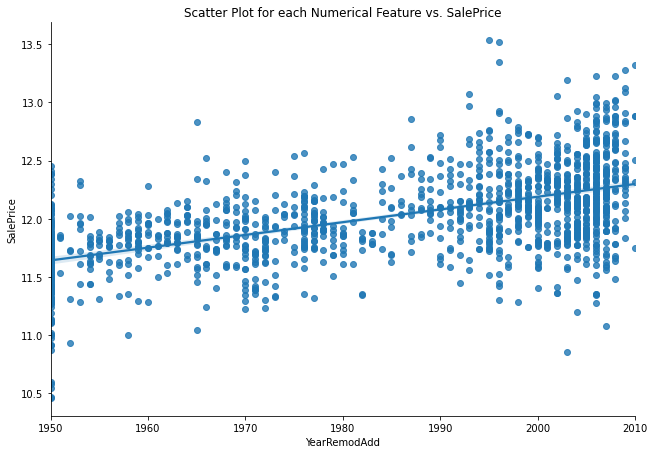

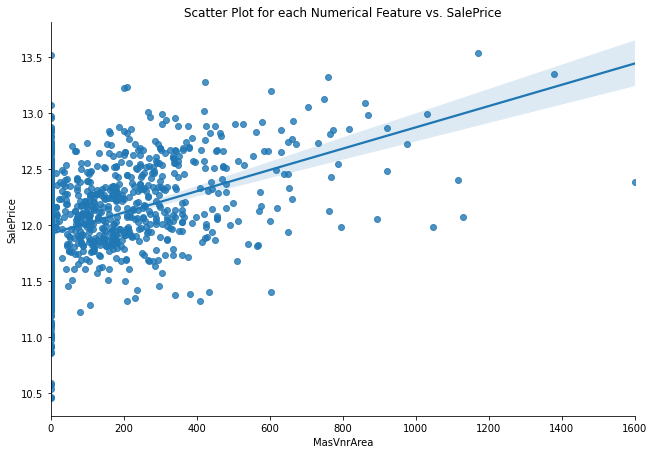

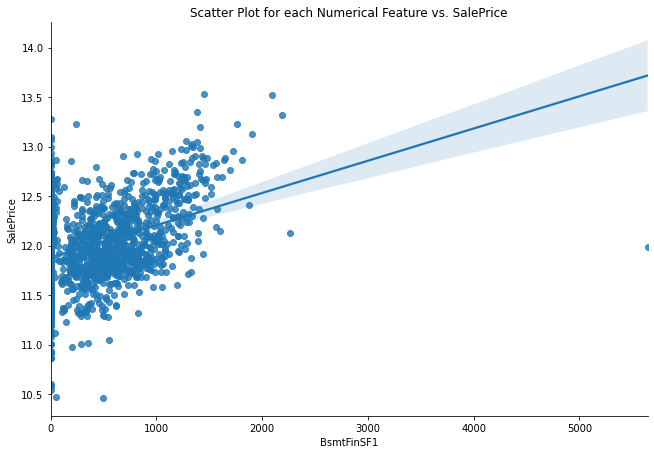

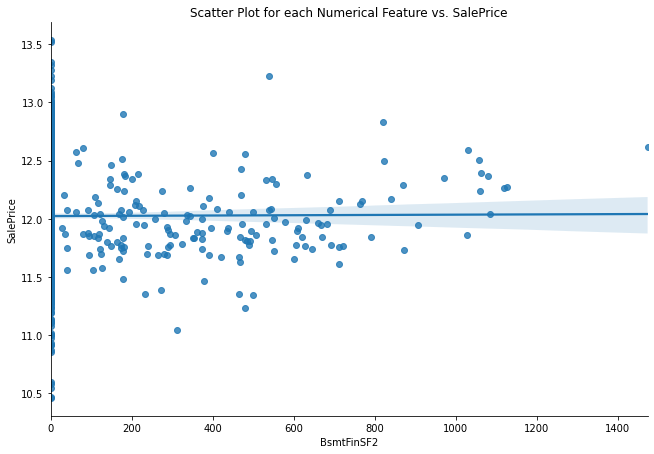

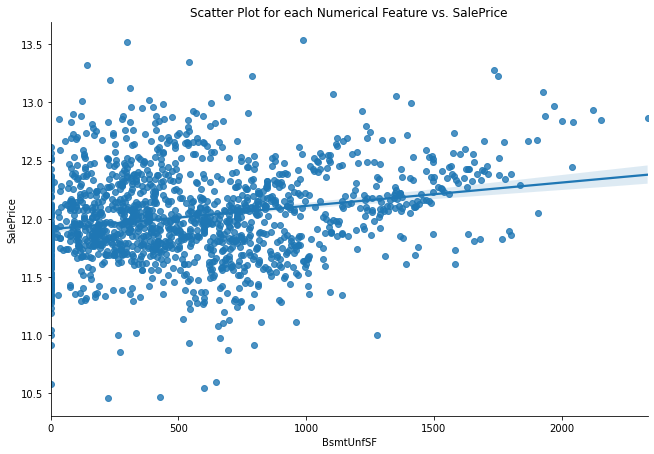

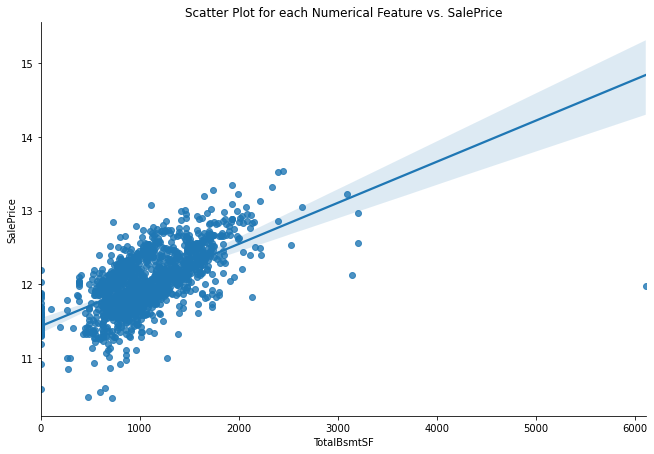

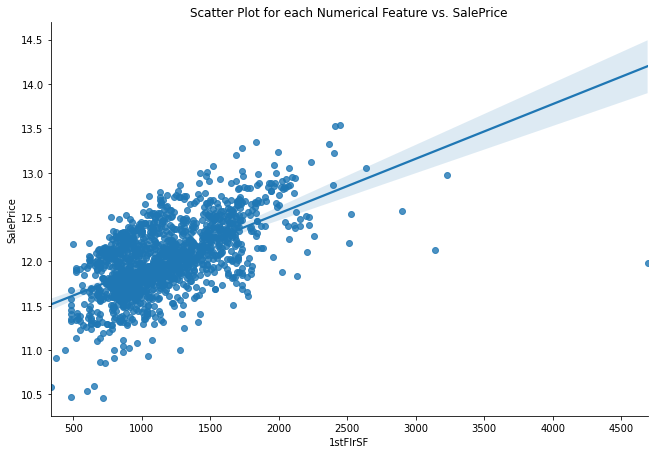

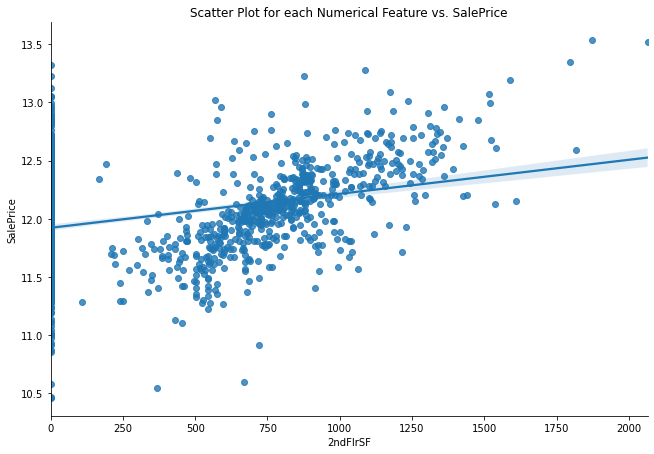

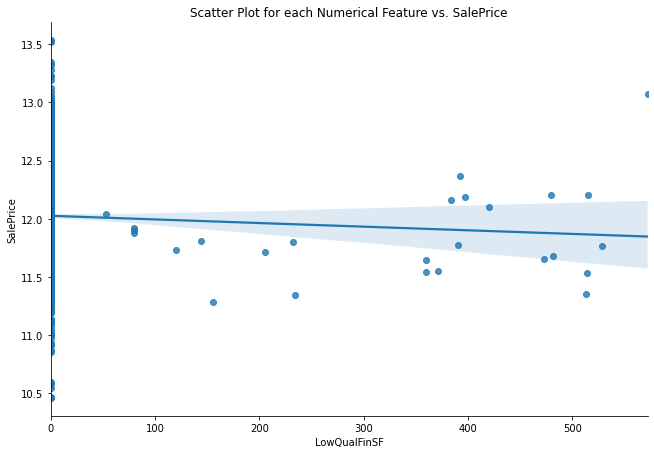

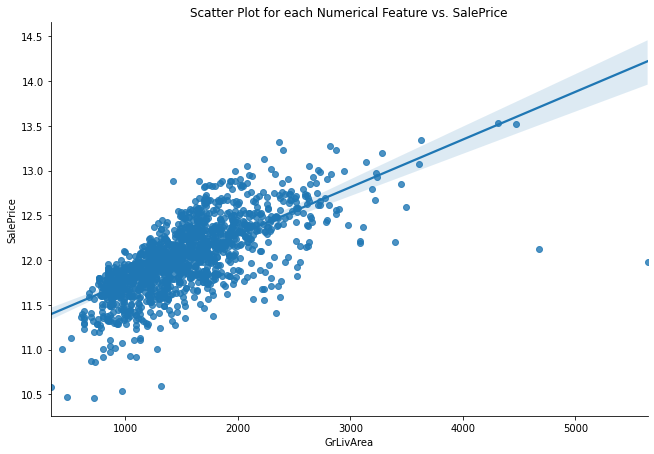

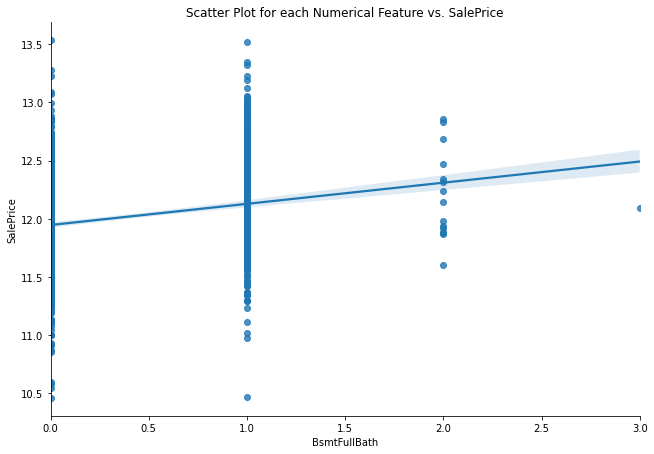

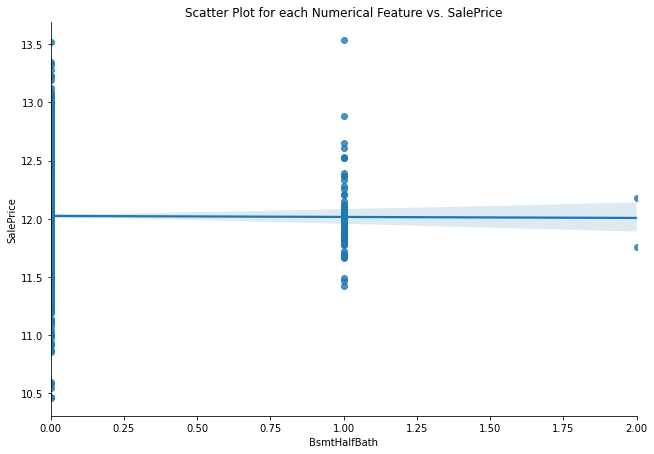

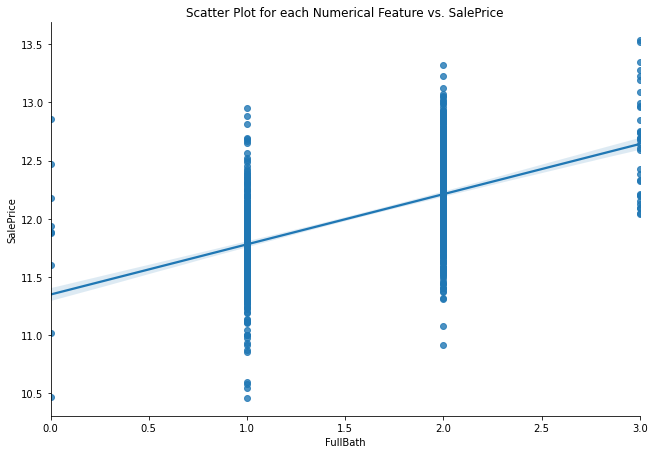

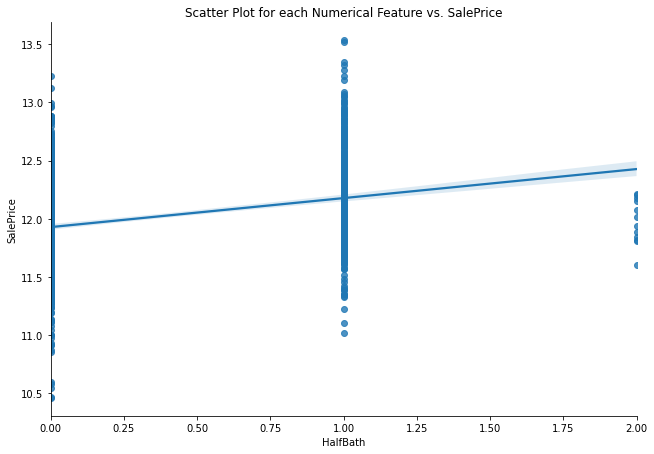

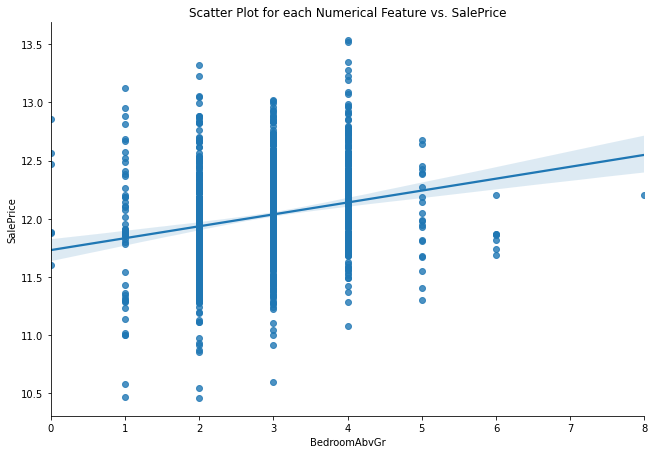

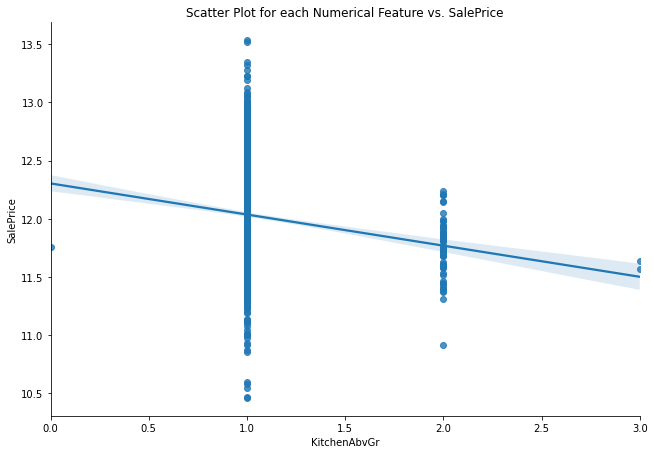

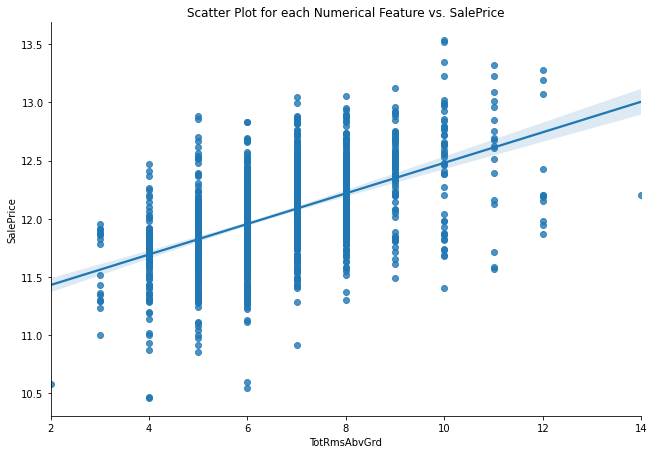

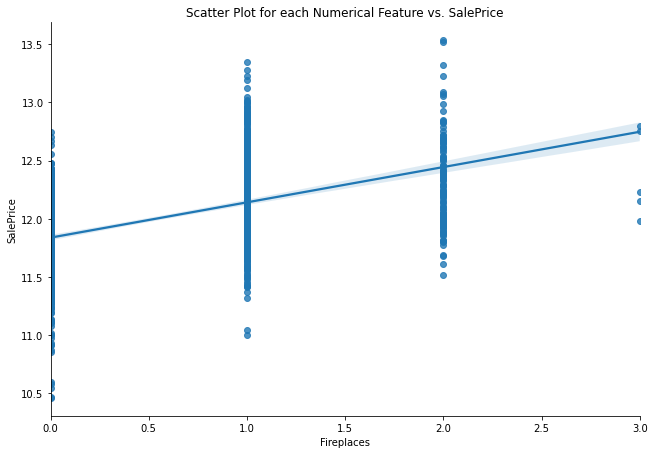

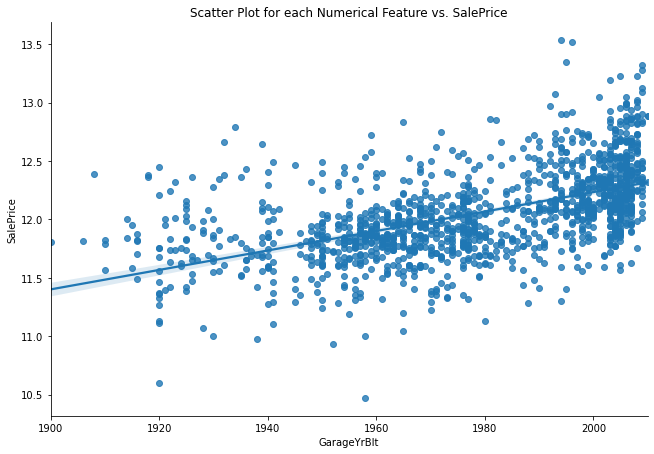

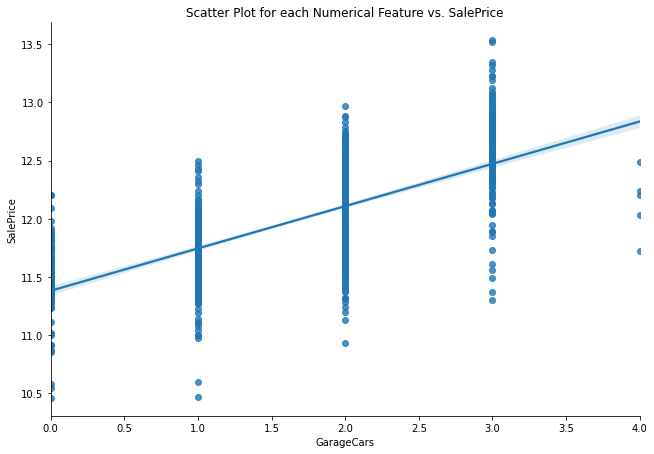

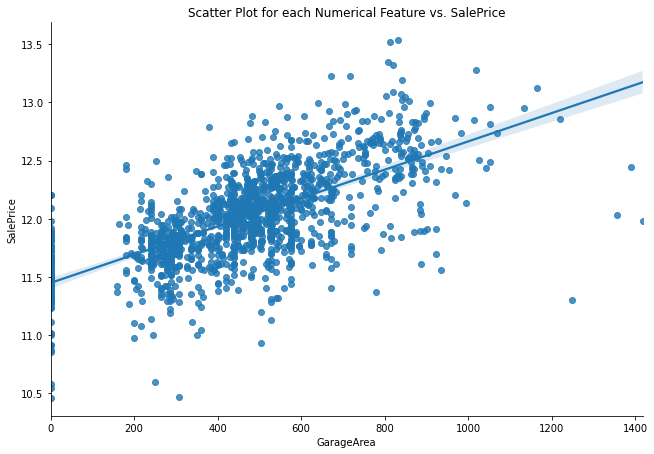

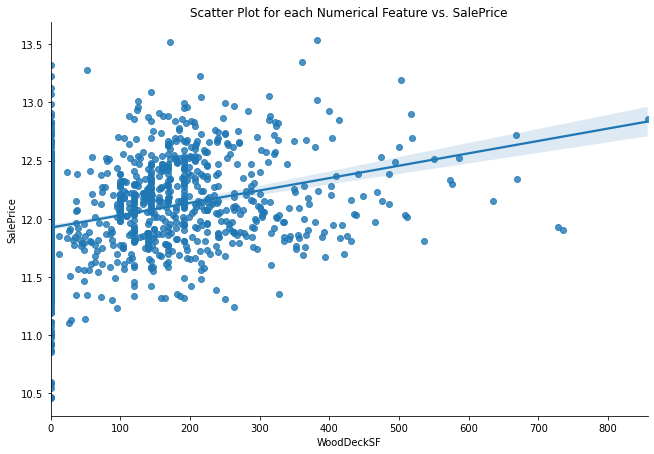

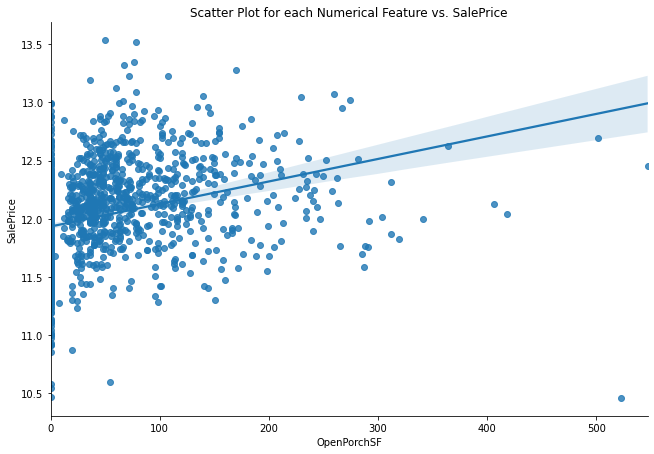

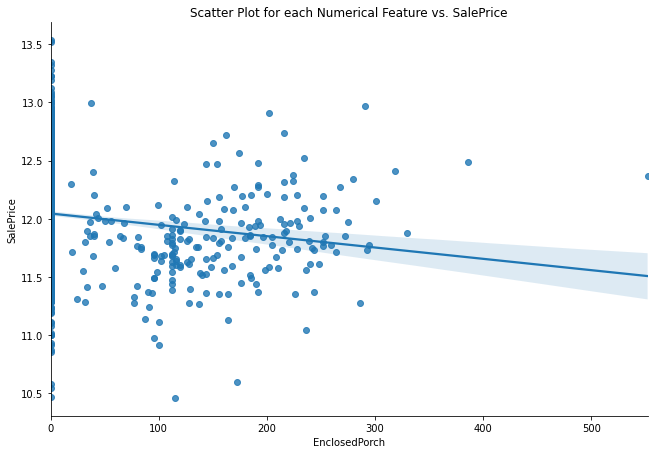

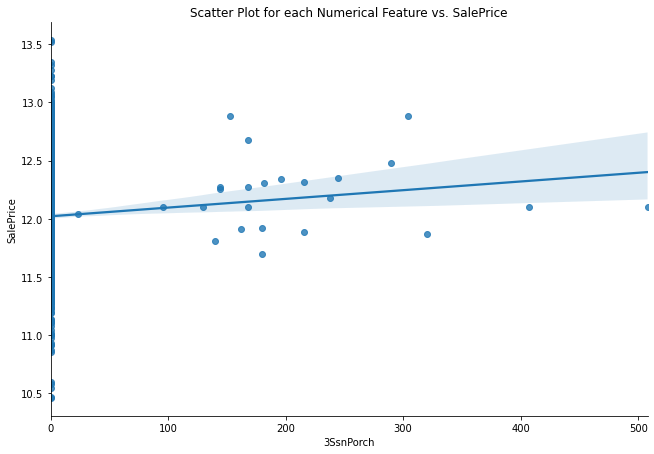

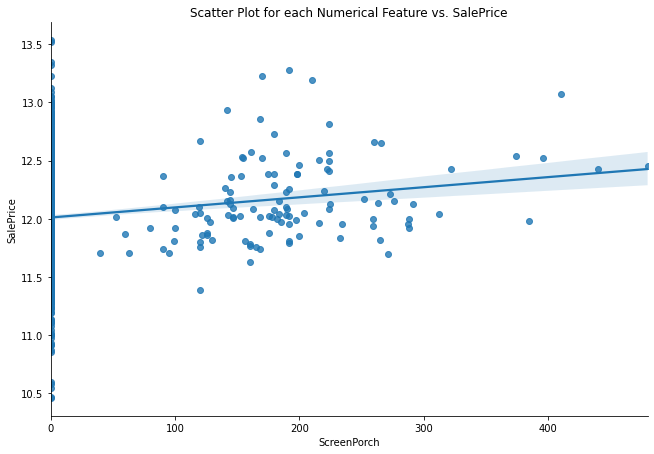

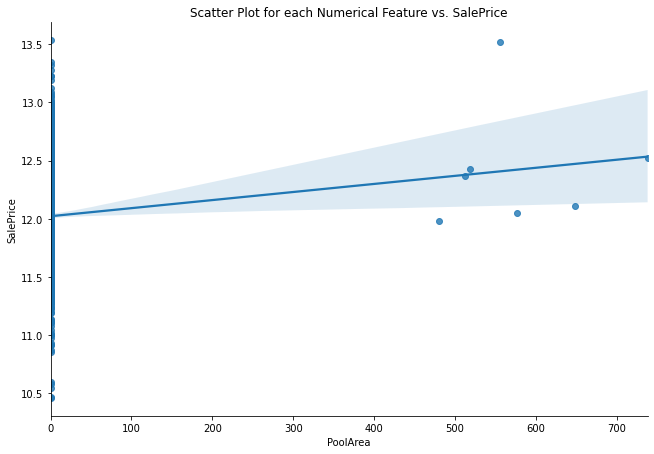

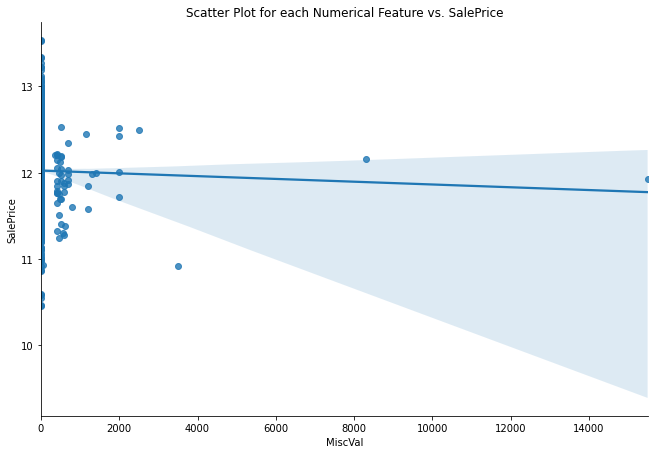

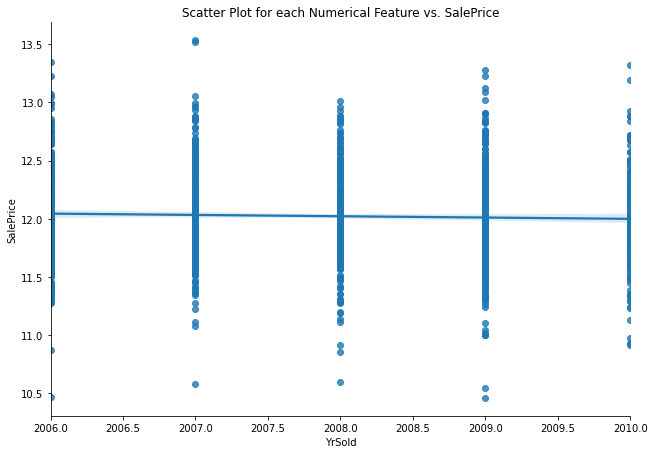

In [27]:
# Take a different look with lmplot

for i in range(0, numerical_feature_names.size-1):
    sns.lmplot(x=df_numerical.columns[i], y='SalePrice', height=6, aspect=1.5, data=df)
    plt.title("Scatter Plot for each Numerical Feature vs. SalePrice");

plt.show()

In [28]:
# Drop the column Id as it does not contain any important information

df = df.drop(columns=['Id'])
df_numerical = df_numerical.drop(columns=['Id'])

In [29]:
# fill na for categorical features

for col in df_categorical.columns:
    mode_val = df_categorical[col].mode()[0]
    df_categorical[col] = df_categorical[col].fillna(mode_val)
    
df_categorical

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1         Veenker      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1455      Gilbert       Norm       Norm     1Fam     2Story     Gable   
1456       NWAmes       Norm       Norm     1Fam     1Story     Gable   
1457      Crawfor       Norm       Norm     1Fam     2Story     Gable   
1458        NAmes       Norm       Norm     1Fam     1Story       Hip   
1459      Edwards       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     MetalSd     MetalSd       None        TA        TA   
2     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng       None        TA        TA   
4     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1455  CompShg     VinylSd     VinylSd       None        TA        TA   
1456  CompShg     Plywood     Plywood      Stone        TA        TA   
1457  CompShg     CemntBd     CmentBd       None        Ex        Gd   
1458  CompShg     MetalSd     MetalSd       None        TA        TA   
1459  CompShg     HdBoard     HdBoard       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1        CBlock       Gd       TA           Gd          ALQ          Unf   
2         PConc       Gd       TA           Mn          GLQ          Unf   
3        BrkTil       TA       Gd           No          ALQ          Unf   
4         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1455      PConc       Gd       TA           No          Unf          Unf   
1456     CBlock       Gd       TA           No          ALQ          Rec   
1457      Stone       TA       Gd           No          GLQ          Unf   
1458     CBlock       TA       TA           Mn          GLQ          Rec   
1459     CBlock       TA       TA           No          BLQ          LwQ   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        Ex          Y      SBrkr          Gd        Typ   
1       GasA        Ex          Y      SBrkr          TA        Typ   
2       GasA        Ex          Y      SBrkr          Gd        Typ   
3       GasA        Gd          Y      SBrkr          Gd        Typ   
4       GasA        Ex          Y      SBrkr          Gd        Typ   
...      ...       ... 

In [30]:
# fill na for categorical features

# df_categorical = df_categorical.fillna("Undefined")

# df_categorical

In [31]:
# convert into dummies

df_dummies = pd.get_dummies(df_categorical, drop_first=True)

df_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     1   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0  

In [32]:
# Check the isna for numerical features 

# df_numerical_isna = df_numerical.isna()

# df_numerical_isna 

In [33]:
# df_numerical_isna.columns = [c+'_isna' for c in df_numerical_isna.columns]

# df_numerical_isna

In [34]:
# fill na for numerical features

df_numerical = df_numerical.fillna(df_numerical.median())

df_numerical.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  YrSold  SalePrice  
0              0          0            0         0        0    2008  12.247694  
1              0          0            0         0        0    2007  12.109011  
2              0          0            0         0        0    2008  12.317167  
3            272          0            0         0        0    2006  11.849398  
4              0          0            0         0        0    2008  12.429216

In [35]:
# df_numerical = pd.concat([df_numerical,df_numerical_isna], axis=1)

# df_numerical.head()

In [36]:
df = pd.concat([df_numerical,df_dummies], axis=1)

df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  YrSold  \
0              0          0            0         0        0    2008   
1              0          0            0         0        0    2007   
2              0          0            0         0        0    2008   
3            272          0            0         0        0    2006   
4              0          0            0         0        0    2008   

   SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0  12.247694            0            0            1            0            1   
1  12.109011            0            0            1            0            1   
2  12.317167            0            0            1            0            1   
3  11.849398            0            0            1            0            1   
4  12.429216            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  ...  \
0                1                 0                  0              0  ...   
1                1                 0                  0              1  ...   
2                1                 0                  0              0  ...   
3      

In [37]:
df.shape

(1460, 243)

In [38]:
# See the percentage of missing data again

missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = True)

count    %
MSSubClass                 0  0.0
ExterCond_TA               0  0.0
Foundation_CBlock          0  0.0
Foundation_PConc           0  0.0
Foundation_Slab            0  0.0
...                      ...  ...
Condition2_Feedr           0  0.0
Condition2_Norm            0  0.0
Condition2_PosA            0  0.0
Neighborhood_Edwards       0  0.0
SaleCondition_Partial      0  0.0

[243 rows x 2 columns]

In [39]:
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  YrSold  \
0              0          0            0         0        0    2008   
1              0          0            0         0        0    2007   
2              0          0            0         0        0    2008   
3            272          0            0         0        0    2006   
4              0          0            0         0        0    2008   

   SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0  12.247694            0            0            1            0            1   
1  12.109011            0            0            1            0            1   
2  12.317167            0            0            1            0            1   
3  11.849398            0            0            1            0            1   
4  12.429216            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  ...  \
0                1                 0                  0              0  ...   
1                1                 0                  0              1  ...   
2                1                 0                  0              0  ...   
3      

# Preprocessing and Training

In [40]:
# Next let us define the target variable

y = df['SalePrice']

print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64


In [41]:
X = df.drop(['SalePrice'], axis=1)


In [42]:
# train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [43]:
lm = LinearRegression().fit(X_train, y_train)

In [44]:

y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [45]:
# The train set returns a pretty good score (possibly overfits the data)

lm.score(X_train, y_train)

0.9440144998904153

In [46]:
# However, we got a low score in the test set

lm.score(X_test, y_test)

0.7728150364463631

In [47]:
num_pipeline = Pipeline([('std_scaler',StandardScaler()), ('f_regression', SelectKBest(f_regression, k=240)),('lin_reg', LinearRegression())])



In [48]:
num_pipeline.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('f_regression',
                 SelectKBest(k=240,
                             score_func=<function f_regression at 0x7f8573314ee0>)),
                ('lin_reg', LinearRegression())])

In [49]:
num_pipeline.score(X_test, y_test)

0.7728199771506432

# Modelling

## Linear Regression

In [50]:
pipe = make_pipeline(
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

In [51]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'selectkbest', 'linearregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

In [52]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [53]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [54]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7f8573314ee0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [55]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [56]:
lr_grid_cv.best_params_

{'selectkbest__k': 134}

In [57]:

# best_k = lr_grid_cv.best_params_['selectkbest__k']
# plt.subplots(figsize=(10, 5))
# plt.errorbar(cv_k, score_mean, yerr=score_std)
# plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
# plt.xlabel('k')
# plt.ylabel('CV score (r-squared)')
# plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [58]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [59]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

GrLivArea           0.141947
MSZoning_RL         0.108769
MSZoning_RM         0.086814
OverallQual         0.074223
MSZoning_FV         0.057639
                      ...   
BsmtFinType1_Unf   -0.032232
2ndFlrSF           -0.036210
MSSubClass         -0.039278
KitchenQual_TA     -0.040108
BsmtQual_TA        -0.040923
Length: 134, dtype: float64

In [60]:
pipe_KBest = make_pipeline(
    StandardScaler(),
    SelectKBest(f_regression, k=134),
    LinearRegression()
)

In [61]:
pipe_KBest.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=134,
                             score_func=<function f_regression at 0x7f8573314ee0>)),
                ('linearregression', LinearRegression())])

In [62]:
pipe_KBest.score(X_test, y_test)

0.912282434572568

In [63]:
y_tr_pred = pipe_KBest.predict(X_train)
y_te_pred = pipe_KBest.predict(X_test)

In [64]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.9093962710624491, 0.912282434572568)

In [65]:
cv_scores_5 = cross_val_score(pipe_KBest,X,y,cv=5)

print(cv_scores_5)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_5)))

[0.91034593 0.86661082 0.89027471 0.88939006 0.78002694]
Average 5-Fold CV Score: 0.8673296930804044


In [66]:
# The standard error for train and test sets are computed below 

rmse = np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_tr_pred)))
print("Root Mean Squared Error (train): {}".format(rmse))

rmse = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_te_pred)))
print("Root Mean Squared Error (test): {}".format(rmse))

Root Mean Squared Error (train): 25698.95786365189
Root Mean Squared Error (test): 25393.332768779645


## Lasso

In [67]:
# Next, we apply the Lasso regression model to our dataframe. First, we select the grid of alpha values

params_grid= {'alpha': 4*5**np.logspace(2,-2,100)}

In [68]:
# Perform GridSearchCV to find optimal value of alpha

lasso= Lasso(random_state= 42)
grid_lasso= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid,
                        cv= 5,
                        scoring= 'r2',
                        return_train_score= True,
                        verbose= 1)      
grid_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid={'alpha': array([3.15544362e+70, 1.94806548e+64, 4.28329229e+58, 2.99624640e+53,
       6.01659968e+48, 3.15800894e+44, 3.97826279e+40, 1.11279188e+37,
       6.43869699e+33, 7.22441866e+30, 1.48209914e+28, 5.26913727e+25,
       3.09155101e+23, 2.86324978e+21, 4.01953995e+19, 8.24291277e+17,
       2.38754092e+16, 9.47249015e+14, 5....
       4.39540411e+00, 4.35874958e+00, 4.32561754e+00, 4.29564820e+00,
       4.26852207e+00, 4.24395492e+00, 4.22169339e+00, 4.20151120e+00,
       4.18320595e+00, 4.16659635e+00, 4.15151972e+00, 4.13782996e+00,
       4.12539567e+00, 4.11409855e+00, 4.10383197e+00, 4.09449975e+00,
       4.08601506e+00, 4.07829944e+00, 4.07128194e+00, 4.06489837e+00])},
             return_train_score=True, scoring='r2', verbose=1)

In [69]:
# Print the best estimation for alpha

grid_lasso.best_estimator_

Lasso(alpha=4.064898365069302, random_state=42)

In [70]:
# Print the best score

grid_lasso.best_score_

0.6437542947646981

In [71]:
cv_results = pd.DataFrame(grid_lasso.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]

cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
43       0.004362      0.000039         0.002006        0.000012   76.153722   
44       0.005200      0.001072         0.002142        0.000277   58.615467   
45       0.004491      0.000079         0.002399        0.000519   46.177695   
46       0.004526      0.000245         0.001995        0.000015   37.158145   
47       0.004795      0.000405         0.002036        0.000054   30.483168   
48       0.005177      0.001115         0.002769        0.001078   25.451046   
49       0.005176      0.001017         0.002071        0.000098    21.59295   
50       0.004782      0.000094         0.002056        0.000054   18.589201   
51       0.005271      0.001146         0.002028        0.000031    16.21767   
52       0.006145      0.002419         0.002022        0.000025   14.321278   
53       0.004779      0.000042         0.002019        0.000020   12.787124   
54       0.005507      0.001508         0.002589        0.001192   11.532822   
55       0.005596      0.001437         0.002007        0.000005   10.497394   
56       0.004946      0.000052         0.002032        0.000026    9.635112   
57       0.005946      0.001468         0.002166        0.000088    8.911258   
58       0.005032      0.000149         0.001993        0.000019    8.299165   
59       0.005518      0.000854         0.002019        0.000025    7.778131   
60       0.005349      0.000385         0.002277        0.000550     7.33192   
61       0.006414      0.002681         0.002179        0.000351    6.947675   
62       0.005380      0.000342         0.002028        0.000024    6.615126   
63       0.005504      0.000436         0.002054        0.000109       6.326   
64       0.005991      0.001103         0.002357        0.000615    6.073575   
65       0.005730      0.000804         0.001992        0.000003    5.852356   
66       0.005525      0.000335         0.001997        0.000015    5.657812   
67       0.005666      0.000356         0.002593        0.001197    5.486187   
68       0.006089      0.000761         0.002097        0.000110    5.334347   
69       0.006012      0.000393         0.002020        0.000029    5.199657   
70       0.005915      0.000429         0.002225        0.000281    5.079896   
71       0.005879      0.000431         0.002235        0.000445    4.973178   
72       0.006906      0.002287         0.002014        0.000042    4.877893   
73       0.007262      0.001376         0.002941        0.001431    4.792664   
74       0.006779      0.001670         0.002074        0.000133    4.716303   
75       0.005949      0.000366         0.002119        0.000211    4.647786   
76       0.006038      0.000333         0.002027        0.000023    4.586223   
77       0.006156      0.000378         0.002022        0.000020     4.53084   
78       0.006119      0.000342         0.002040        0.000032    4.480959   
79       0.005980      0.000337         0.002038        0.000036    4.435987   
80       0.006176      0.000581         0.001992        0.000024    4.395404   
81       0.006247      0.000780         0.002447        0.000851     4.35875   
82       0.006247      0.000396         0.002280        0.000554    4.325618   
83       0.006781      0.001596         0.002137        0.000200    4.295648   
84       0.006552      0.000961         0.002025        0.000027    4.268522   
85       0.006015      0.000320         0.001997        0.000012    4.243955   
86       0.006067      0.000337         0.001998        0.000012    4.221693   
87       0.006103      0.000306         0.002293        0.000520    4.201511   
88       0.006131      0.000340         0.002026        0.000023    4.183206   
89       0.006681      0.000690         0.002891        0.001076    4.166596   
90       0.006084      0.000303         0.002022        0.000033     4.15152   
91       0.006252      0.000471         0.001997        0.000017     4.13783   
92  

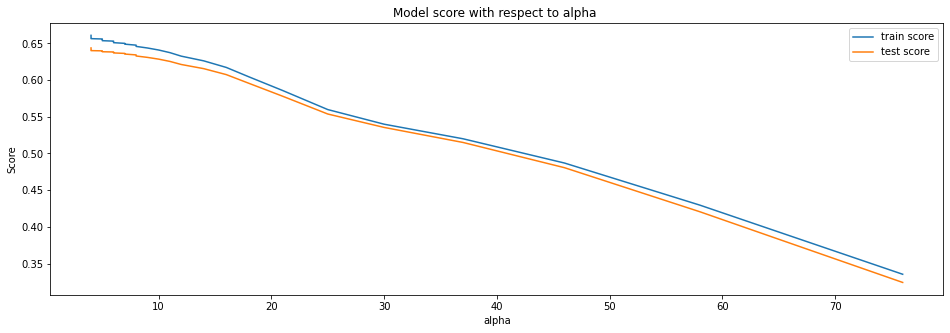

In [72]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Score')
plt.title("Model score with respect to alpha ")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [73]:
# It seems like the score function seems to be a smooth function with respect to the alpha hyperparameter. 
# Let us get closer to the global max score by varying the alpha around the value that we found above


params_grid_max= {'alpha': np.linspace(0.0,10.0,200)}

grid_lasso_max= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid_max,
                        cv= 5,
                        scoring= 'r2',
                        return_train_score= True,
                        verbose= 1)      
grid_lasso_max.fit(X_train, y_train)

print(grid_lasso_max.best_estimator_)
print(grid_lasso_max.best_score_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.793e+00, tolerance: 1.428e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Rid

Lasso(alpha=0.05025125628140704, random_state=42)
0.7791404441674323


In [74]:
# Last we print the values of standard error 

rmse = np.sqrt(mean_squared_error(np.exp(y_train),np.exp(grid_lasso_max.predict(X_train))))
print("Root mean squared error in the train set: {}".format(rmse))

rmse = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(grid_lasso_max.predict(X_test))))
print("Root mean squared error in the test set: {}".format(rmse))

Root mean squared error in the train set: 52134.78601544473
Root mean squared error in the test set: 32628.97888780522


## Ridge

In [75]:
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# from sklearn.feature_selection import SelectKBest, f_regression
# from sklearn.linear_model import Ridge

# # Create a pipeline with SelectKBest and Ridge
# pipe = Pipeline([
#     ('selector', SelectKBest(score_func=f_regression)),
#     ('ridge', Ridge(random_state=42))
# ])

# # Define the hyperparameters to tune
# params_grid = {
#     'selector__k': range(160, 221),  # k can be any integer value
#     'ridge__alpha': 4*5**np.logspace(2,-2,100)
# }

# # Grid search over the hyperparameters with 5-fold cross-validation
# grid_ridge = GridSearchCV(pipe, params_grid, cv=5, scoring='r2', return_train_score=True, verbose=1)

# # Fit the grid search on the training data
# grid_ridge.fit(X_train, y_train)


In [76]:
# Next, we apply the Ridge model to our dataframe. First, we select the grid of alpha values

params_grid= {'alpha': 4*5**np.logspace(2,-2,100)}

In [77]:
# Perform GridSearchCV to find optimal value of alpha

ridge= Ridge(random_state= 42)
grid_ridge= GridSearchCV(estimator= ridge, 
                        param_grid= params_grid,
                        cv= 5,
                        scoring= 'r2',
                        return_train_score= True,
                        verbose= 1)      
grid_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': array([3.15544362e+70, 1.94806548e+64, 4.28329229e+58, 2.99624640e+53,
       6.01659968e+48, 3.15800894e+44, 3.97826279e+40, 1.11279188e+37,
       6.43869699e+33, 7.22441866e+30, 1.48209914e+28, 5.26913727e+25,
       3.09155101e+23, 2.86324978e+21, 4.01953995e+19, 8.24291277e+17,
       2.38754092e+16, 9.47249015e+14, 5....
       4.39540411e+00, 4.35874958e+00, 4.32561754e+00, 4.29564820e+00,
       4.26852207e+00, 4.24395492e+00, 4.22169339e+00, 4.20151120e+00,
       4.18320595e+00, 4.16659635e+00, 4.15151972e+00, 4.13782996e+00,
       4.12539567e+00, 4.11409855e+00, 4.10383197e+00, 4.09449975e+00,
       4.08601506e+00, 4.07829944e+00, 4.07128194e+00, 4.06489837e+00])},
             return_train_score=True, scoring='r2', verbose=1)

In [78]:
# Print the best estimation for alpha

grid_ridge.best_estimator_

Ridge(alpha=16.217669865086737, random_state=42)

In [79]:
# Print the best score

grid_ridge.best_score_

0.858348706753709

In [80]:
cv_results = pd.DataFrame(grid_ridge.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]

cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
43       0.005759      0.000141         0.002269        0.000275   76.153722   
44       0.005742      0.000398         0.002404        0.000290   58.615467   
45       0.005521      0.000271         0.002258        0.000207   46.177695   
46       0.005599      0.000358         0.002503        0.000491   37.158145   
47       0.005852      0.000473         0.003005        0.001672   30.483168   
48       0.005703      0.000231         0.002164        0.000109   25.451046   
49       0.005856      0.000247         0.002152        0.000043    21.59295   
50       0.005615      0.000275         0.002487        0.000298   18.589201   
51       0.005478      0.000177         0.002451        0.000282    16.21767   
52       0.005639      0.000242         0.002250        0.000260   14.321278   
53       0.005998      0.000348         0.002263        0.000155   12.787124   
54       0.005857      0.000410         0.002256        0.000202   11.532822   
55       0.005794      0.000253         0.002334        0.000208   10.497394   
56       0.005801      0.000181         0.002474        0.000121    9.635112   
57       0.006724      0.001837         0.002234        0.000193    8.911258   
58       0.005867      0.000832         0.002095        0.000021    8.299165   
59       0.005438      0.000233         0.002256        0.000339    7.778131   
60       0.005533      0.000258         0.002120        0.000022     7.33192   
61       0.005898      0.000202         0.002522        0.000358    6.947675   
62       0.005758      0.000262         0.002874        0.000186    6.615126   
63       0.005681      0.000130         0.002197        0.000070       6.326   
64       0.005846      0.000406         0.002483        0.000495    6.073575   
65       0.005616      0.000493         0.002145        0.000045    5.852356   
66       0.005938      0.000747         0.002302        0.000237    5.657812   
67       0.005792      0.000220         0.002404        0.000195    5.486187   
68       0.005586      0.000185         0.002381        0.000284    5.334347   
69       0.006147      0.000456         0.002377        0.000274    5.199657   
70       0.006383      0.000584         0.002476        0.000333    5.079896   
71       0.005534      0.000099         0.002393        0.000482    4.973178   
72       0.005713      0.000272         0.002206        0.000092    4.877893   
73       0.005424      0.000174         0.002249        0.000231    4.792664   
74       0.005569      0.000299         0.002210        0.000184    4.716303   
75       0.005630      0.000130         0.002267        0.000220    4.647786   
76       0.005432      0.000208         0.002291        0.000322    4.586223   
77       0.005819      0.000172         0.002576        0.000407     4.53084   
78       0.005691      0.000301         0.002462        0.000207    4.480959   
79       0.005651      0.000220         0.002124        0.000026    4.435987   
80       0.006851      0.002031         0.002122        0.000024    4.395404   
81       0.005794      0.000474         0.002403        0.000252     4.35875   
82       0.005820      0.000296         0.002349        0.000268    4.325618   
83       0.005539      0.000171         0.002482        0.000494    4.295648   
84       0.005824      0.000215         0.002329        0.000205    4.268522   
85       0.006338      0.001229         0.002253        0.000279    4.243955   
86       0.006420      0.000763         0.002381        0.000441    4.221693   
87       0.005808      0.000218         0.003044        0.001195    4.201511   
88       0.006587      0.001391         0.002229        0.000094    4.183206   
89       0.005753      0.000316         0.002322        0.000172    4.166596   
90       0.005810      0.000149         0.002663        0.000446     4.15152   
91       0.006142      0.001205         0.002289        0.000212     4.13783   
92  

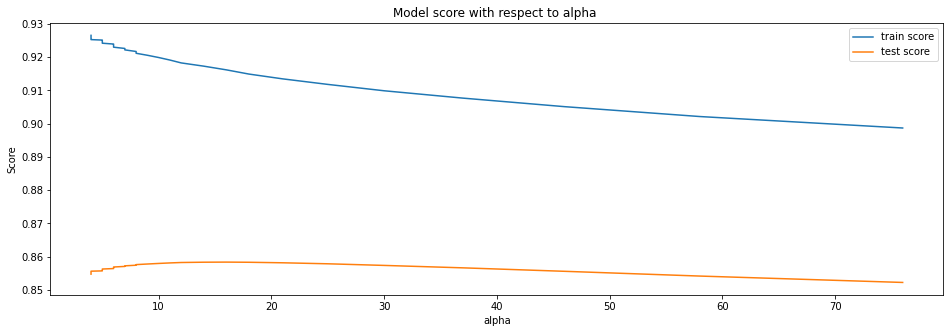

In [81]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Score')
plt.title("Model score with respect to alpha ")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [82]:
# It seems like the score function seems to be a smooth function with respect to the alpha hyperparameter. 
# Let us get closer to the global max score by varying the alpha around the value that we found above


params_grid_max= {'alpha': np.linspace(12.0,20.0,200)}

grid_ridge_max= GridSearchCV(estimator= ridge, 
                        param_grid= params_grid_max,
                        cv= 5,
                        scoring= 'r2',
                        return_train_score= True,
                        verbose= 1)      
grid_ridge_max.fit(X_train, y_train)

print(grid_ridge_max.best_estimator_)
print(grid_ridge_max.best_score_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Ridge(alpha=16.100502512562812, random_state=42)
0.8583488612057668


In [83]:
rmse = np.sqrt(mean_squared_error(np.exp(y_train),np.exp(grid_ridge_max.predict(X_train))))
print("Root mean squared error in the train set: {}".format(rmse))

rmse = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(grid_ridge_max.predict(X_test))))
print("Root mean squared error in the test set: {}".format(rmse))


Root mean squared error in the train set: 25902.421569584145
Root mean squared error in the test set: 25885.045834222426


## Random Forest

In [84]:
# Create a Random Forest pipeline

RandomForest_pipe = make_pipeline(
    RandomForestRegressor(random_state=47, max_depth=20, min_samples_split=15, max_features=200, n_estimators=100)
)


In [85]:

RandomForest_cv_results = cross_validate(RandomForest_pipe, X_train, y_train, cv=5)

In [86]:
RandomForest_cv_scores = RandomForest_cv_results['test_score']
RandomForest_cv_scores

array([0.88382373, 0.82477052, 0.84322581, 0.86168235, 0.89476428])

In [87]:
np.mean(RandomForest_cv_scores), np.std(RandomForest_cv_scores)

(0.8616533387947548, 0.025642845647678127)

In [88]:
# Hyperparameter search using GridSearchCV

# available criterias: ['mse', 'mae', 'gini', 'entropy']
    
n_est = [int(n) for n in np.logspace(start=2, stop=3, num=10)]
grid_params = {
        'randomforestregressor__max_depth': [10, 15, 20],
        'randomforestregressor__min_samples_split': [2,3,5],
        'randomforestregressor__criterion': ['mse'],
        'randomforestregressor__n_estimators': n_est
}

        
grid_params

{'randomforestregressor__max_depth': [10, 15, 20],
 'randomforestregressor__min_samples_split': [2, 3, 5],
 'randomforestregressor__criterion': ['mse'],
 'randomforestregressor__n_estimators': [100,
  129,
  166,
  215,
  278,
  359,
  464,
  599,
  774,
  1000]}

In [89]:
cv_results = pd.DataFrame(RandomForest_cv_scores) 
print(cv_results.keys())

RangeIndex(start=0, stop=1, step=1)


In [90]:
cv_results = pd.DataFrame(RandomForest_cv_scores) 

print(cv_results.mean())
print(cv_results.std())

0    0.861653
dtype: float64
0    0.02867
dtype: float64


In [91]:
RandomForest_grid_cv = GridSearchCV(RandomForest_pipe, param_grid=grid_params, cv=5,scoring='r2', n_jobs=-1)

In [92]:
RandomForest_grid_cv.fit(X_train, y_train)

/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(max_depth=20,
                                                              max_features=200,
                                                              min_samples_split=15,
                                                              random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__criterion': ['mse'],
                         'randomforestregressor__max_depth': [10, 15, 20],
                         'randomforestregressor__min_samples_split': [2, 3, 5],
                         'randomforestregressor__n_estimators': [100, 129, 166,
                                                                 215, 278, 359,
                                                                 464, 599, 774,
                                                                 1000]},
             scoring='r2')

In [93]:
print("Best hyperparameters:", RandomForest_grid_cv.best_params_)
print("Best score:", RandomForest_grid_cv.best_score_)

# RandomForest_grid_cv.best_params_

Best hyperparameters: {'randomforestregressor__criterion': 'mse', 'randomforestregressor__max_depth': 20, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 774}
Best score: 0.8668109549453943


In [94]:
RandomForest_best_cv_results = cross_validate(RandomForest_grid_cv.best_estimator_, X_train, y_train, cv=5)
RandomForest_best_scores = RandomForest_best_cv_results['test_score']
RandomForest_best_scores

/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages

array([0.89156124, 0.82120202, 0.85022765, 0.87298217, 0.8980817 ])

In [95]:
np.mean(RandomForest_best_scores), np.std(RandomForest_best_scores)

(0.8668109549453943, 0.02822658635783702)

In [97]:
# Last we print the values of standard error 

rmse = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(RandomForest_grid_cv.predict(X_train))))
print("Root Mean Squared Error in the train set: {}".format(rmse))

rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(RandomForest_grid_cv.predict(X_test))))
print("Root Mean Squared Error in the test set: {}".format(rmse))

Root Mean Squared Error in the train set: 11488.415299357588
Root Mean Squared Error in the test set: 29750.42936636262


In [98]:
RandomForest_grid_cv.score(X_train, y_train)

0.9822432335020687

In [99]:
RandomForest_grid_cv.score(X_test, y_test)

0.8851238379318179